In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

## Fine tuning script

In [2]:
print("Hi")

Hi


In [ ]:
# %%capture
# !pip uninstall -y numpy torch torchvision torchaudio transformers diffusers huggingface_hub accelerate
# !pip install numpy==1.26.4 torch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 --no-cache-dir --force-reinstall
# !pip install transformers==4.35.2 diffusers==0.21.4 huggingface_hub==0.19.4 accelerate==0.25.0 --no-cache-dir --force-reinstall


In [ ]:
# %cd /kaggle/working
# !rm -rf FCVG
# !git clone https://github.com/Tian-one/FCVG.git
# %cd FCVG


In [ ]:
# !pip install --upgrade pip
# !pip uninstall -y transformers diffusers huggingface_hub
# !pip install transformers==4.35.2 diffusers==0.21.4 huggingface_hub==0.19.4 accelerate==0.25.0 torch==2.0.1 --quiet --force-reinstall


In [ ]:
# !pip install -r requirements.txt

In [9]:
# !pip uninstall -y huggingface_hub
# !pip install huggingface_hub==0.19.4


(Loading + inferencing) for long upsampled video

In [ ]:
# %%writefile /kaggle/working/interpolate_video_segments.py

# import os
# import cv2
# import glob
# import subprocess

# # ----------------------------
# # USER CONFIG
# # ----------------------------
# DOWN_VIDEO = "/kaggle/working/downsampled_video.mp4"   # your downsampled input video
# FCVG_SCRIPT = "/kaggle/working/FCVG/demo_FCVG.py"  # path to your demo_FCVG.py
# OUTPUT_ROOT = "/kaggle/working/outputs_full"
# UPSAMPLED_VIDEO = os.path.join(OUTPUT_ROOT, "merged_full.mp4")

# HEIGHT, WIDTH = 256, 576
# MAX_FRAMES = 7
# NUM_STEPS = 25

# os.makedirs(OUTPUT_ROOT, exist_ok=True)

# # ----------------------------
# # Extract frames from downsampled video
# # ----------------------------
# frames_dir = os.path.join(OUTPUT_ROOT, "frames")
# os.makedirs(frames_dir, exist_ok=True)

# cap = cv2.VideoCapture(DOWN_VIDEO)
# if not cap.isOpened():
#     raise RuntimeError(f"Cannot open {DOWN_VIDEO}")

# frames = []
# idx = 0
# while True:
#     ret, frame = cap.read()
#     if not ret:
#         break
#     path = os.path.join(frames_dir, f"frame_{idx:04d}.png")
#     cv2.imwrite(path, frame)
#     frames.append(path)
#     idx += 1
# cap.release()
# print(f"✅ Extracted {len(frames)} frames.")

# # ----------------------------
# # Run FCVG on each pair {i, i+1}
# # ----------------------------
# segment_paths = []
# for i in range(len(frames) - 1):
#     img1 = frames[i]
#     img2 = frames[i + 1]
#     segment_dir = os.path.join(OUTPUT_ROOT, f"segment_{i:03d}")
#     os.makedirs(segment_dir, exist_ok=True)

#     cmd = (
#         f"python {FCVG_SCRIPT} "
#         f"--pretrained_model_name_or_path stabilityai/stable-video-diffusion-img2vid-xt-1-1 "
#         f"--controlnext_path ./checkpoints/controlnext.safetensors "
#         f"--unet_path ./checkpoints/unet.safetensors "
#         f"--image1_path {img1} "
#         f"--image2_path {img2} "
#         f"--output_dir {segment_dir} "
#         f"--max_frame_num {MAX_FRAMES} "
#         f"--num_inference_steps {NUM_STEPS} "
#         f"--height {HEIGHT} --width {WIDTH}"
#     )

#     print(f"\n🚀 Running FCVG for segment {i}: {os.path.basename(img1)} → {os.path.basename(img2)}")
#     ret = os.system(cmd)
#     if ret != 0:
#         print(f"⚠️ Segment {i} failed. Skipping.")
#         continue

#     # Locate generated video
#     result_videos = glob.glob(f"{segment_dir}/**/result.mp4", recursive=True)
#     if result_videos:
#         segment_paths.append(result_videos[0])
#     else:
#         print(f"⚠️ No result found for segment {i} in {segment_dir}")

# print(f"\n✅ Generated {len(segment_paths)} valid segment videos.")

# # ----------------------------
# # Combine into one final upsampled video
# # ----------------------------
# if len(segment_paths) == 0:
#     raise RuntimeError("No segment videos generated — check paths and FCVG runs.")

# concat_txt = os.path.join(OUTPUT_ROOT, "concat_list.txt")
# with open(concat_txt, "w") as f:
#     for v in sorted(segment_paths):
#         f.write(f"file '{os.path.abspath(v)}'\n")

# cmd = f"ffmpeg -y -f concat -safe 0 -i {concat_txt} -c copy {UPSAMPLED_VIDEO}"
# print("\n🎬 Merging all interpolated segments...")
# subprocess.run(cmd, shell=True, check=True)
# print(f"✅ Done! Final upsampled video saved to: {UPSAMPLED_VIDEO}")


 demo_FCVG.py file script

# Run below code

In [2]:
!git clone https://github.com/Tian-one/FCVG.git
%cd FCVG

fatal: destination path 'FCVG' already exists and is not an empty directory.
/home/ie643_visionforge/venv/Untitled Folder/FCVG


In [5]:
!wget https://github.com/cvg/GlueStick/releases/download/v0.1_arxiv/checkpoint_GlueStick_MD.tar -P models/resources/weights

--2025-10-31 18:04:29--  https://github.com/cvg/GlueStick/releases/download/v0.1_arxiv/checkpoint_GlueStick_MD.tar
Resolving github.com (github.com)... 20.207.73.82
Connecting to github.com (github.com)|20.207.73.82|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/622867606/b6e2035f-ead7-4d20-93f4-855c5396a8b2?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-01T02%3A00%3A58Z&rscd=attachment%3B+filename%3Dcheckpoint_GlueStick_MD.tar&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-01T01%3A00%3A00Z&ske=2025-11-01T02%3A00%3A58Z&sks=b&skv=2018-11-09&sig=PjPy%2FQQTGU1NDgGvmZk3GoXsaF8rbU6YqHoWTRs2%2B54%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MTk2MjY2OSwibmJmIjoxNzYxOTU5MDY5LCJwYXRoIjoicmVsZWFz

In [7]:
pip install --upgrade huggingface_hub


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install --force-reinstall huggingface_hub


Defaulting to user installation because normal site-packages is not writeable
  Using cached huggingface_hub-1.0.1-py3-none-any.whl (503 kB)
  Using cached typer_slim-0.20.0-py3-none-any.whl (47 kB)
  Using cached packaging-25.0-py3-none-any.whl (66 kB)
  Using cached filelock-3.20.0-py3-none-any.whl (16 kB)
  Using cached shellingham-1.5.4-py2.py3-none-any.whl (9.8 kB)
  Using cached fsspec-2025.10.0-py3-none-any.whl (200 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
  Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
  Using cached hf_xet-1.2.0-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.3 MB)
  Using cached pyyaml-6.0.3-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (770 kB)
  Using cached httpx-0.28.1-py3-none-any.whl (73 kB)
  Using cached idna-3.11-py3-none-any.whl (71 kB)
  Using cached anyio-4.11.0-py3-none-any.whl (109 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl (78 kB)
  Using cached certifi-2025.

In [ ]:
from huggingface_hub import HfFolder
HfFolder.save_token("Your HF token")


In [ ]:
from huggingface_hub import login
login("Your HF token")

KeyboardInterrupt: 

In [18]:
from huggingface_hub import whoami
print(whoami())

{'type': 'user', 'id': '67c430bd711461ca0efba3f0', 'name': 'Gouthami10', 'fullname': 'Tudi', 'isPro': False, 'avatarUrl': '/avatars/d43ff08e25a12a261566b54a2f312909.svg', 'orgs': [], 'auth': {'type': 'access_token', 'accessToken': {'displayName': 'IE643', 'role': 'fineGrained', 'createdAt': '2025-10-16T09:37:12.056Z', 'fineGrained': {'canReadGatedRepos': True, 'global': [], 'scoped': [{'entity': {'_id': '67c430bd711461ca0efba3f0', 'type': 'user', 'name': 'Gouthami10'}, 'permissions': ['repo.content.read', 'repo.write', 'inference.serverless.write', 'inference.endpoints.infer.write', 'inference.endpoints.write', 'user.webhooks.read', 'user.webhooks.write', 'collection.read', 'collection.write']}]}}}}


In [18]:
!find / -type d -name "checkpoints" 2>/dev/null


/home/ie643_errorcode500/errorcode500-working/30/checkpoints
/home/ie643_lambdaforce/checkpoints
/home/ie643_backpropnetwork/checkpoints
^C


Demo_FCVG.py

In [20]:
!mkdir -p "/home/ie643_visionforge/venv/Untitled Folder/FCVG/checkpoints/dwpose"

# Copy instead of move
!mv "/home/ie643_visionforge/venv/Untitled Folder/unet.safetensors" "/home/ie643_visionforge/venv/Untitled Folder/FCVG/checkpoints/"
!mv "/home/ie643_visionforge/venv/Untitled Folder/controlnext.safetensors" "/home/ie643_visionforge/venv/Untitled Folder/FCVG/checkpoints/"



In [27]:
!mv "/home/ie643_visionforge/venv/Untitled Folder/dw-ll_ucoco_384.onnx" "/home/ie643_visionforge/venv/Untitled Folder/FCVG/checkpoints/dwpose"
!mv "/home/ie643_visionforge/venv/Untitled Folder/yolox_l.onnx" "/home/ie643_visionforge/venv/Untitled Folder/FCVG/checkpoints/dwpose"


mv: cannot stat '/home/ie643_visionforge/venv/Untitled Folder/dw-ll_ucoco_384.onnx': No such file or directory


In [15]:
!ls checkpoints/

 controlnext.safetensors   dwpose  'Put checkpoints here'   unet.safetensors


In [29]:
 
!mv "/home/ie643_visionforge/venv/Untitled Folder/superpoint_v1.pth" "/home/ie643_visionforge/venv/Untitled Folder/FCVG/models/resources/weights"



In [30]:
!pip install decord

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.6/13.6 MB 33.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 27.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [31]:
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.4/17.4 MB 28.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.2/323.2 kB 6.5 MB/s eta 0:00:0000:01
  Using cached packaging-25.0-py3-none-any.whl (66 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.1 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 2.0 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 13.0 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [32]:
!pip install pytlsd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 2.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


code to extract all the frames from original full video

In [10]:
import cv2
import os

# ----------------------------
# User Config
# ----------------------------
video_path = "/home/ie643_visionforge/venv/Untitled Folder/downsampled.mp4"  # path to your uploaded video
output_dir = "/home/ie643_visionforge/venv/Untitled Folder"               # where frames will be saved
frame_skip = 1  # 1 = every frame, 2 = every 2nd frame, etc.

# ----------------------------
# Create output directory
# ----------------------------
os.makedirs(output_dir, exist_ok=True)

# ----------------------------
# Open video
# ----------------------------
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise ValueError(f"Unable to open video: {video_path}")

frame_count = 0
saved_count = 0
print("Extracting frames...")

# ----------------------------
# Read frames
# ----------------------------
while True:
    ret, frame = cap.read()
    if not ret:
        break
    if frame_count % frame_skip == 0:
        frame_file = os.path.join(output_dir, f"frame_{saved_count:04d}.png")
        cv2.imwrite(frame_file, frame)
        saved_count += 1
    frame_count += 1

cap.release()
print(f"Done! Extracted {saved_count} frames to {output_dir}")


Extracting frames...
Done! Extracted 324 frames to /kaggle/working/video_frames


# Till Here

Code for full vidoe to downsampled video

# DOWNSAMPLING CODE

In [ ]:

import cv2
import os

# ----------------------------
# User Config
# ----------------------------
video_path = "/kaggle/input/lecture1/lecture_vid1.mp4"   # original video
output_path = "/kaggle/working/downsampled_video.mp4"    # output downsampled video
skip_between = 5  # number of frames to skip between saved frames

# ----------------------------
# Open the input video
# ----------------------------
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise ValueError(f"❌ Unable to open video: {video_path}")

fps = cap.get(cv2.CAP_PROP_FPS)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Compute new FPS to roughly match real-time playback
# (If you skip 5, you're keeping 1/6th of frames)
new_fps = fps / (skip_between + 1)

# Define codec and create VideoWriter
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
os.makedirs(os.path.dirname(output_path), exist_ok=True)
out = cv2.VideoWriter(output_path, fourcc, new_fps, (width, height))

frame_count = 0
saved_count = 0
print(f"🎬 Creating downsampled video... (keeping every {skip_between + 1}th frame)")

while True:
    ret, frame = cap.read()
    if not ret:
        break
    # Save 1, skip 'skip_between'
    if frame_count % (skip_between + 1) == 0:
        out.write(frame)
        saved_count += 1
    frame_count += 1

cap.release()
out.release()

print(f"✅ Done! Downsampled video saved to: {output_path}")
print(f"   Original FPS: {fps:.2f} → New FPS: {new_fps:.2f}")
print(f"   Saved {saved_count} frames out of {frame_count}")


# FULL LONG VIDEO

In [27]:
!ls /home/ie643_visionforge/venv/'Untitled Folder'

 downsampled.mp4   FCVG  'ie-project (3).ipynb'   test_frames


In [28]:
%%writefile "/home/ie643_visionforge/venv/Untitled Folder/FCVG/efficient_video_interpolation.py"
import sys
sys.path.append("/home/ie643_visionforge/venv/Untitled Folder/FCVG/")  # adjust if your repo is in another folder
import os, cv2, glob, torch
import numpy as np
from PIL import Image
from diffusers.utils import export_to_video
from models.controlnext_vid_svd import ControlNeXtSDVModel
from models.unet_spatio_temporal_condition_controlnext import UNetSpatioTemporalConditionControlNeXtModel
from pipeline.pipeline_FCVG import StableVideoDiffusionPipelineControlNeXtReverse
from transformers import CLIPVisionModelWithProjection
from diffusers import AutoencoderKLTemporalDecoder
from models.gluestick.models.two_view_pipeline import TwoViewPipeline
from models.gluestick import GLUESTICK_ROOT, batch_to_np, numpy_image_to_torch
from safetensors.torch import load_file
from utils.util import *
import subprocess





import os, sys, cv2, torch, numpy as np
from PIL import Image
from diffusers.utils import export_to_video
from transformers import CLIPVisionModelWithProjection
from diffusers import AutoencoderKLTemporalDecoder
from safetensors.torch import load_file

# add FCVG repo to path
repo_path = "/home/ie643_visionforge/venv/Untitled Folder/FCVG/"
if repo_path not in sys.path:
    sys.path.append(repo_path)

# FCVG imports
from pipeline.pipeline_FCVG import StableVideoDiffusionPipelineControlNeXtReverse
from models.controlnext_vid_svd import ControlNeXtSDVModel
from models.unet_spatio_temporal_condition_controlnext import UNetSpatioTemporalConditionControlNeXtModel
from models.gluestick.models.two_view_pipeline import TwoViewPipeline
from models.gluestick import GLUESTICK_ROOT, batch_to_np, numpy_image_to_torch
from models.gluestick.drawing import plot_color_line_matches_opencv
from models.dwpose.preprocess import get_image_pose
from models.dwpose.util import draw_pose
from utils.util import *


# ----------------------------
# CONFIG
# ----------------------------
VIDEO_PATH = "/home/ie643_visionforge/venv/Untitled Folder/last_downsampled_5.mp4"
OUTPUT_ROOT = "/home/ie643_visionforge/venv/Untitled Folder"
MAX_FRAME_NUM = 7
HEIGHT, WIDTH = 576, 1024

os.makedirs(OUTPUT_ROOT, exist_ok=True)

# ----------------------------
# LOAD MODELS ONCE
# ----------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"

print("Loading models once...")

glue_conf = {
    'name': 'two_view_pipeline',
    'use_lines': True,
    'extractor': {'name': 'wireframe',
                  'sp_params': {'force_num_keypoints': False, 'max_num_keypoints': 1000},
                  'wireframe_params': {'merge_points': True, 'merge_line_endpoints': True},
                  'max_n_lines': 300},
    'matcher': {'name': 'gluestick',
                'weights': str(GLUESTICK_ROOT / 'resources' / 'weights' / 'checkpoint_GlueStick_MD.tar'),
                'trainable': False},
}
glue_model = TwoViewPipeline(glue_conf).to(device).eval()

unet = UNetSpatioTemporalConditionControlNeXtModel.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid-xt-1-1", subfolder="unet")
controlnext = ControlNeXtSDVModel()
controlnext.load_state_dict(load_file("./checkpoints/controlnext.safetensors"))
unet.load_state_dict(load_file("./checkpoints/unet.safetensors"), strict=False)
vae = AutoencoderKLTemporalDecoder.from_pretrained("stabilityai/stable-video-diffusion-img2vid-xt-1-1", subfolder="vae")
image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid-xt-1-1", subfolder="image_encoder")

pipeline = StableVideoDiffusionPipelineControlNeXtReverse.from_pretrained(
    "stabilityai/stable-video-diffusion-img2vid-xt-1-1",
    controlnext=controlnext, unet=unet, vae=vae, image_encoder=image_encoder)
pipeline.enable_model_cpu_offload()

print("✅ Models loaded once successfully")


def infer_gluestick_interp(model, image1, image2, interp_frames=5, save_matching_path=None, save_gif=False, lw=2):

    gray0 = np.array(image1.convert('L'))
    gray1 = np.array(image2.convert('L'))

    torch_gray0, torch_gray1 = numpy_image_to_torch(gray0), numpy_image_to_torch(gray1)
    torch_gray0, torch_gray1 = torch_gray0.to(device)[None], torch_gray1.to(device)[None]
    x = {'image0': torch_gray0, 'image1': torch_gray1}
    pred = model(x)

    pred = batch_to_np(pred)
    kp0, kp1 = pred["keypoints0"], pred["keypoints1"]
    m0 = pred["matches0"]

    line_seg0, line_seg1 = pred["lines0"], pred["lines1"]
    line_matches = pred["line_matches0"]

    valid_matches = m0 != -1
    match_indices = m0[valid_matches]
    matched_kps0 = kp0[valid_matches]
    matched_kps1 = kp1[match_indices]

    valid_matches = line_matches != -1
    match_indices = line_matches[valid_matches]
    matched_lines0 = line_seg0[valid_matches]
    matched_lines1 = line_seg1[match_indices]

    img0, img1 = cv2.cvtColor(gray0, cv2.COLOR_GRAY2BGR), cv2.cvtColor(gray1, cv2.COLOR_GRAY2BGR)
    if matched_lines0 is None:
        img = np.zeros_like(img0)
        images = []
        for i in range(interp_frames+2):
            images.append(img)
        return images
    all_interp_matches = [matched_lines0]
    for i in range(interp_frames):
        frac = i / (interp_frames - 1) 

        interped = interpolate_matches_linear(matched_lines0, matched_lines1, frac)
        all_interp_matches.append(interped)
    all_interp_matches.append(matched_lines1)
    images = plot_color_line_matches_opencv(img0, all_interp_matches, save_path=save_matching_path, lw=lw)

    images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
    return images


def infer_poses_interp(image1, image2, num_frames=5, save_pose_path=None):

    image1 = np.array(image1)
    image2 = np.array(image2)
    height, width, _ = image1.shape
    pose_image, pose1 = get_image_pose(image1)
    pose_image2, pose2 = get_image_pose(image2)

    bodies1 = pose1['bodies']
    candidate1 = bodies1['candidate']
    subset1 = bodies1['subset']
    bodies2 = pose2['bodies']
    candidate2 = bodies2['candidate']
    subset2 = bodies2['subset']
    new_match = match_bodies(candidate1, candidate2, subset1, subset2)
    interped_pose = [pose_image.transpose((1, 2, 0))]
    numbers = np.arange(min(len(candidate1), len(candidate2)))
    subset = np.array(np.split(numbers, min(len(subset1), len(subset2))))
    candidate2_idx = np.concatenate(subset[new_match])
    candidate2 = candidate2[candidate2_idx]
    

    for i in range(num_frames):
        frac = i / (num_frames - 1) 
        
        interp_candidate = [interpolate_linear(c1, c2, frac) for c1, c2 in zip(candidate1, candidate2)] 
        interp_faces = [interpolate_linear(f1, f2, frac) for f1, f2 in zip(pose1['faces'], pose2['faces'][new_match])]
        hands_match = new_match + [x + len(new_match) for x in new_match]
        interp_hands = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['hands'], pose2['hands'][hands_match])]


        interp_hands_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['hands_score'], pose2['hands_score'][hands_match])]
        interp_faces_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['faces_score'], pose2['faces_score'][new_match])]
        interp_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(bodies1['score'], bodies2['score'][new_match])]


        frame_data = {
            'bodies': {
                'candidate': interp_candidate,
                'subset': subset,
                'score': interp_score
            },
            'faces': interp_faces,
            'faces_score': interp_faces_score,
            'hands': interp_hands,
            'hands_score':interp_hands_score
        }
    

        interp_image = draw_pose(frame_data, height, width).transpose((1, 2, 0))
        interped_pose.append(interp_image)
    interped_pose.append(pose_image2.transpose((1, 2, 0)))
    if save_pose_path:
        for i in range(len(interped_pose)):
            Image.fromarray(interped_pose[i]).save(os.path.join(save_pose_path, 'pose{:02d}.png'.format(i)))

    return interped_pose


def crop_and_resize(image, size=(1024, 576)):
    target_width, target_height = size
    original_width, original_height = image.size

    target_ratio = target_width / target_height
    original_ratio = original_width / original_height

    if original_ratio > target_ratio:
        new_width = int(original_height * target_ratio)
        left = (original_width - new_width) // 2
        right = left + new_width
        top = 0
        bottom = original_height
    else:
        new_height = int(original_width / target_ratio)
        top = (original_height - new_height) // 2
        bottom = top + new_height
        left = 0
        right = original_width

    cropped_image = image.crop((left, top, right, bottom))
    resized_image = cropped_image.resize(size)

    return resized_image

def save_images(images, path='./results'):
    save_folder = path
    if not os.path.exists(save_folder):
        os.mkdir(save_folder)
    gif_path = os.path.join(save_folder, 'out.gif')
    images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=100)

    for i in range(len(images)):
        save_images_path = os.path.join(save_folder, '{:02d}.png'.format(i))
        images[i].save(save_images_path)

def fuse_conditions(match_imgs, pose_imgs, flow_imgs=None, hand_imgs=None):
    """Fuse GlueStick, DWpose, optional Flow + Hand maps into a single RGB control image."""
    fused = []
    N = min(len(match_imgs), len(pose_imgs))
    for i in range(N):
        base = match_imgs[i].astype(np.float32)
        pose = pose_imgs[i].astype(np.float32)
        flow = flow_imgs[i].astype(np.float32) if flow_imgs is not None else np.zeros_like(base)
        hand = hand_imgs[i].astype(np.float32) if hand_imgs is not None else np.zeros_like(base)

        flow = cv2.normalize(flow, None, 0, 255, cv2.NORM_MINMAX)
        hand = cv2.normalize(hand, None, 0, 255, cv2.NORM_MINMAX)

        # weighted fusion
        fusion = np.clip(
            0.5 * base + 0.3 * pose + 0.15 * flow + 0.05 * hand,
            0, 255
        ).astype(np.uint8)
        fused.append(Image.fromarray(fusion))
    return fused



# ----------------------------
# EXTRACT FRAMES
# ----------------------------
frames_dir = os.path.join(OUTPUT_ROOT, "frames")
os.makedirs(frames_dir, exist_ok=True)
cap = cv2.VideoCapture(VIDEO_PATH)
frames = []
idx = 0
while True:
    ret, frame = cap.read()
    if not ret: break
    path = os.path.join(frames_dir, f"frame_{idx:04d}.png")
    cv2.imwrite(path, frame)
    frames.append(path)
    idx += 1
cap.release()
print(f"✅ Extracted {len(frames)} frames")

# ----------------------------
# RUN INFERENCE FOR EACH PAIR
# ----------------------------
final_frames = []
for i in range(len(frames) - 1):
    print(f"Interpolating between frame {i} and {i+1}")
    image1 = Image.open(frames[i]).convert("RGB")
    image2 = Image.open(frames[i+1]).convert("RGB")
    image1 = crop_and_resize(image1, (WIDTH, HEIGHT))
    image2 = crop_and_resize(image2, (WIDTH, HEIGHT))

    interped_matching = infer_gluestick_interp(glue_model, image1, image2, interp_frames=MAX_FRAME_NUM-2)
    interped_pose = infer_poses_interp(image1, image2, num_frames=MAX_FRAME_NUM-2)
    fused_controls = fuse_conditions(interped_matching, interped_pose)

    video_frames = pipeline(
        image1, image2, fused_controls[:MAX_FRAME_NUM],
        decode_chunk_size=2, num_frames=MAX_FRAME_NUM,
        motion_bucket_id=127.0, fps=7,
        control_weight=1.0, width=WIDTH, height=HEIGHT,
        min_guidance_scale=3.0, max_guidance_scale=3.0,
        frames_per_batch=MAX_FRAME_NUM, num_inference_steps=25, overlap=6
    ).frames

    seq = [img for sublist in video_frames for img in sublist]
    if i > 0:
        seq = seq[1:]  # avoid duplicate overlap
    final_frames.extend(seq)

print("✅ All pairs processed.")

# ----------------------------
# EXPORT FINAL VIDEO
# ----------------------------
out_path = os.path.join(OUTPUT_ROOT, "final_upsampled.mp4")
export_to_video(final_frames, out_path , fps= 30)
print(f"🎬 Final upsampled video saved to {out_path}")


Overwriting /home/ie643_visionforge/venv/Untitled Folder/FCVG/efficient_video_interpolation.py


In [6]:
!ls checkpoints/

 controlnext.safetensors   dwpose  'Put checkpoints here'   unet.safetensors


In [29]:
!python "/home/ie643_visionforge/venv/Untitled Folder/FCVG/efficient_video_interpolation.py"


/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
Loading models once...
/home/ie643_visionforge/venv/Untitled Folder/FCVG/models/gluestick/models/gluestick.py:346: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use 

  0%|                                                    | 0/25 [00:00<?, ?it/s]/home/ie643_visionforge/venv/lib/python3.10/site-packages/diffusers/models/downsampling.py:135: FutureWarning: `scale` is deprecated and will be removed in version 1.0.0. The `scale` argument is deprecated and will be ignored. Please remove it, as passing it will raise an error in the future. `scale` should directly be passed while calling the underlying pipeline component i.e., via `cross_attention_kwargs`.
  deprecate("scale", "1.0.0", deprecation_message)
100%|███████████████████████████████████████████| 25/25 [03:07<00:00,  7.49s/it]
Interpolating between frame 11 and 12
  0%|                                                    | 0/25 [00:00<?, ?it/s]/home/ie643_visionforge/venv/lib/python3.10/site-packages/diffusers/models/downsampling.py:135: FutureWarning: `scale` is deprecated and will be removed in version 1.0.0. The `scale` argument is deprecated and will be ignored. Please remove it, as passing it

# Baseline With 2 Frames Input

Installing Dependencies For baseline model

In [34]:
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu128


Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://download.pytorch.org/whl/cu128
Note: you may need to restart the kernel to use updated packages.


In [39]:
import sys
print(sys.executable)


/opt/anaconda/bin/python


In [46]:
!pip uninstall huggingface-hub -y
!pip install "huggingface-hub==0.17.3"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.5 MB/s eta 0:00:00a 0:00:01
  Using cached typing_extensions-4.15.0-py3-none-any.whl (44 kB)
  Using cached pyyaml-6.0.3-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (770 kB)
  Using cached fsspec-2025.10.0-py3-none-any.whl (200 kB)
  Using cached filelock-3.20.0-py3-none-any.whl (16 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 1.4 MB/s eta 0:00:00ta 0:00:01
  Using cached idna-3.11-py3-none-any.whl (71 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.8/129.8 kB 3.1 MB/s eta 0:00:00a 0:00:01
  Using cached certifi-2025.10.5-py3-none-any.whl (163 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.6/153.6 kB 3.5 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [14]:
!pip uninstall huggingface-hub -y
!pip install "huggingface-hub<1.0,>=0.19.3"



Found existing installation: huggingface-hub 1.0.1
Uninstalling huggingface-hub-1.0.1:
  Successfully uninstalled huggingface-hub-1.0.1
  Using cached huggingface_hub-0.36.0-py3-none-any.whl (566 kB)

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [9]:
pip install "huggingface-hub>=0.19.3,<1.0"


Defaulting to user installation because normal site-packages is not writeable
  Using cached huggingface_hub-0.36.0-py3-none-any.whl (566 kB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [15]:
!pip show huggingface-hub

Name: huggingface-hub
Version: 0.36.0
Summary: Client library to download and publish models, datasets and other repos on the huggingface.co hub
Home-page: https://github.com/huggingface/huggingface_hub
Author: Hugging Face, Inc.
Author-email: julien@huggingface.co
License: Apache
Location: /home/ie643_visionforge/venv/lib/python3.10/site-packages
Requires: filelock, fsspec, hf-xet, packaging, pyyaml, requests, tqdm, typing-extensions
Required-by: accelerate, diffusers, tokenizers, transformers


In [16]:
!export PYTHONNOUSERSITE=1

In [18]:
!pip install omegaconf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.6 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 2.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  DEPRECATION: antlr4-python3-runtime is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559
  Running setup.py install for antlr4-python3-runtime ... done

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [20]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 18.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 24.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 7.1 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 2.7 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [22]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 28.1 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 kB 11.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 kB 8.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [24]:
!pip install imageio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 7.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [26]:
!pip install einops

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [29]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 30.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 7.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 12.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [9]:
!source /home/ie643_visionforge/venv/bin/activate

In [12]:
!which python

/home/ie643_visionforge/venv/bin/python


In [13]:
!pip install imageio-ffmpeg


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [15]:
!python -m ipykernel install --user --name visionforge --display-name "Python (visionforge)"

Installed kernelspec visionforge in /home/ie643_visionforge/.local/share/jupyter/kernels/visionforge


In [1]:
import imageio_ffmpeg
print(imageio_ffmpeg.get_ffmpeg_exe())

/home/ie643_visionforge/venv/lib/python3.10/site-packages/imageio_ffmpeg/binaries/ffmpeg-linux-x86_64-v7.0.2


In [4]:
%cd FCVG

/home/ie643_visionforge/venv/Untitled Folder/FCVG


/home/ie643_visionforge/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [4]:
!ls

checkpoints   demo.sh  Folder	     models    README.md	 results
demo_FCVG.py  example  inference.py  pipeline  requirements.txt  utils


In [6]:
!python demo_FCVG.py --image1_path "/home/ie643_visionforge/venv/Untitled Folder/test_frames/frame_0020.png" \
--image2_path "/home/ie643_visionforge/venv/Untitled Folder/test_frames/frame_0021.png"
# --output_dir ./outputs \
# --max_frame_num 3 \
# --num_inference_steps 5 \
# --height 256 \
# --width 576



/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
Loading Matching Model...
/home/ie643_visionforge/venv/Untitled Folder/FCVG/models/gluestick/models/gluestick.py:346: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please u

In [7]:
!nvidia-smi


Sat Nov  1 03:21:25 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.133.20             Driver Version: 570.133.20     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:17:00.0 Off |                  Off |
| 30%   37C    P2             55W /  450W |   11661MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [8]:
import torch
print(torch.cuda.get_device_name(0))

NVIDIA RTX A6000


In [ ]:
# !git clone https://github.com/princeton-vl/RAFT.git
# !wget https://dl.dropboxusercontent.com/s/4j4z58wuv8o0mfz/raft-sintel.pth -O raft-sintel.pth

## Extra conditions 

In [ ]:
# # demo_FCVG.py  (modified to add Optical Flow + MediaPipe Hands fusion)
# import os
# import torch
# import numpy as np
# from PIL import Image
# from pipeline.pipeline_FCVG import StableVideoDiffusionPipelineControlNeXtReverse
# from models.controlnext_vid_svd import ControlNeXtSDVModel
# from models.unet_spatio_temporal_condition_controlnext import UNetSpatioTemporalConditionControlNeXtModel
# from transformers import CLIPVisionModelWithProjection
# import re 
# from diffusers import AutoencoderKLTemporalDecoder
# from diffusers.utils import export_to_video
# from decord import VideoReader
# import argparse
# from safetensors.torch import load_file
# # from utils.pre_process import preprocess
# from models.gluestick.models.two_view_pipeline import TwoViewPipeline
# from models.gluestick import GLUESTICK_ROOT, batch_to_np, numpy_image_to_torch
# from models.gluestick.drawing import plot_color_line_matches_opencv
# import cv2
# from models.dwpose.preprocess import get_image_pose
# from models.dwpose.util import draw_pose
# from utils.util import *
# import time

# # ---------------------------
# # Optional imports for RAFT and MediaPipe (graceful fallback)
# # ---------------------------
# RAFT_AVAILABLE = False
# try:
#     # try common RAFT import locations; adjust if your clone layout differs
#     from RAFT.core.raft import RAFT as RAFTModel  # if you cloned official RAFT structure
#     RAFT_AVAILABLE = True
# except Exception:
#     try:
#         from raft import RAFT as RAFTModel
#         RAFT_AVAILABLE = True
#     except Exception:
#         RAFT_AVAILABLE = False

# # MediaPipe (for hand landmarks)
# MEDIAPIPE_AVAILABLE = False
# try:
#     import mediapipe as mp
#     MEDIAPIPE_AVAILABLE = True
#     mp_hands = mp.solutions.hands
#     mp_draw = mp.solutions.drawing_utils
#     mp_drawing_styles = mp.solutions.drawing_styles
# except Exception:
#     MEDIAPIPE_AVAILABLE = False

# # ---------------------------
# # New helper functions for flow / hands / fusion
# # ---------------------------
# def flow_to_color(flow):
#     """Convert flow HxWx2 to RGB image (uint8)."""
#     h, w = flow.shape[:2]
#     fx, fy = flow[..., 0], flow[..., 1]
#     mag, ang = cv2.cartToPolar(fx, fy, angleInDegrees=True)
#     hsv = np.zeros((h, w, 3), dtype=np.uint8)
#     hsv[..., 0] = (ang / 2).astype(np.uint8)  # 0..179
#     mag_norm = np.clip((mag / (np.percentile(mag, 98) + 1e-9)) * 255, 0, 255).astype(np.uint8)
#     hsv[..., 1] = mag_norm
#     hsv[..., 2] = np.where(mag > 1e-3, 255, 0).astype(np.uint8)
#     bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
#     rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
#     return rgb

# def compute_flow_farneback(img1, img2):
#     """Compute dense flow using OpenCV Farneback. Inputs are PIL or numpy RGB."""
#     if isinstance(img1, Image.Image):
#         I1 = np.array(img1)
#         I2 = np.array(img2)
#     else:
#         I1, I2 = img1, img2
#     gray1 = cv2.cvtColor(I1, cv2.COLOR_RGB2GRAY)
#     gray2 = cv2.cvtColor(I2, cv2.COLOR_RGB2GRAY)
#     flow = cv2.calcOpticalFlowFarneback(
#         gray1, gray2, None, pyr_scale=0.5, levels=3, winsize=15,
#         iterations=3, poly_n=5, poly_sigma=1.2, flags=0
#     )
#     return flow.astype(np.float32)

# def load_raft_model(path, device):
#     """Load RAFT model if available (best-effort)."""
#     if not RAFT_AVAILABLE:
#         return None
#     model = RAFTModel()
#     checkpoint = torch.load(path, map_location='cpu')
#     # check for state_dict wrapper
#     if 'state_dict' in checkpoint:
#         state_dict = checkpoint['state_dict']
#     else:
#         state_dict = checkpoint
#     new_state = {}
#     for k, v in state_dict.items():
#         new_state[k.replace('module.', '')] = v
#     model.load_state_dict(new_state)
#     model = model.to(device)
#     model.eval()
#     return model

# def compute_flow_raft(model, pil1, pil2, device):
#     """Compute flow using RAFT model. Returns HxWx2 numpy float32."""
#     img1 = np.array(pil1).astype(np.float32) / 255.0
#     img2 = np.array(pil2).astype(np.float32) / 255.0
#     t1 = torch.from_numpy(img1).permute(2,0,1).unsqueeze(0).to(device)
#     t2 = torch.from_numpy(img2).permute(2,0,1).unsqueeze(0).to(device)
#     with torch.no_grad():
#         try:
#             flow_low, flow_up = model(t1, t2, iters=20, test_mode=True)
#             flow = flow_up[0].permute(1,2,0).cpu().numpy()
#         except Exception:
#             out = model(t1, t2)
#             if isinstance(out, (list, tuple)):
#                 flow = out[0][0].permute(1,2,0).cpu().numpy()
#             else:
#                 flow = out[0].permute(1,2,0).cpu().numpy()
#     return flow.astype(np.float32)

# def interp_flow_linear(flow0, flow1, frac):
#     return (1.0 - frac) * flow0 + frac * flow1

# def make_interpolated_flow_images(img0, img1, interp_frames=8, raft_model=None, device='cuda'):
#     """
#     Create flow visualizations for each interpolation step.
#     Returns list of RGB numpy arrays length interp_frames+2 (including endpoints).
#     """
#     # compute forward flow from img0 -> img1
#     if raft_model is not None:
#         try:
#             flow01 = compute_flow_raft(raft_model, img0, img1, device)
#         except Exception as e:
#             print("RAFT failed:", e, "falling back to Farneback")
#             flow01 = compute_flow_farneback(img0, img1)
#     else:
#         flow01 = compute_flow_farneback(img0, img1)

#     imgs = []
#     # create simple per-step scaled flows (approximation)
#     for i in range(interp_frames + 2):
#         frac = i / max(1, interp_frames + 1)
#         inter_flow = flow01 * frac
#         imgs.append(flow_to_color(inter_flow))
#     return imgs

# def make_mediapipe_hand_images(pil_img_list):
#     """
#     Given list of PIL images, returns list of RGB numpy arrays with drawn hand keypoints.
#     If MediaPipe not available, returns black images.
#     """
#     out = []
#     if not MEDIAPIPE_AVAILABLE:
#         for img in pil_img_list:
#             arr = np.array(img)
#             out.append(np.zeros_like(arr))
#         return out

#     with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.3) as hands:
#         for img in pil_img_list:
#             arr = np.array(img)  # RGB
#             results = hands.process(arr)
#             canvas = np.zeros_like(arr)
#             if results.multi_hand_landmarks:
#                 for handLms in results.multi_hand_landmarks:
#                     mp_draw.draw_landmarks(
#                         canvas,
#                         handLms,
#                         mp_hands.HAND_CONNECTIONS,
#                         mp_drawing_styles.get_default_hand_landmarks_style(),
#                         mp_drawing_styles.get_default_hand_connections_style(),
#                     )
#             out.append(canvas)
#     return out

# def fuse_conditions(match_imgs, pose_imgs, flow_imgs=None, hand_imgs=None):
#     """
#     Overlay fusion:
#       base = match_imgs
#       overlay pose where present
#       overlay flow (visualization) where present
#       overlay hand landmarks last (priority)
#     All inputs are lists of numpy RGB arrays.
#     Returns list of PIL images.
#     """
#     fused = []
#     N = min(len(match_imgs), len(pose_imgs))
#     for i in range(N):
#         base = match_imgs[i].copy()
#         pose = pose_imgs[i]
#         # overlay pose (non-zero pixels)
#         mask_pose = np.any(pose != 0, axis=2)
#         base[mask_pose] = pose[mask_pose]

#         if flow_imgs is not None and i < len(flow_imgs):
#             flow = flow_imgs[i]
#             mask_flow = np.any(flow != 0, axis=2)
#             base[mask_flow] = flow[mask_flow]

#         if hand_imgs is not None and i < len(hand_imgs):
#             hand = hand_imgs[i]
#             mask_hand = np.any(hand != 0, axis=2)
#             base[mask_hand] = hand[mask_hand]

#         fused.append(Image.fromarray(base))
#     return fused

# # ---------------------------
# # -- original parse_args / helpers (unchanged)
# # ---------------------------
# def parse_args():
#     parser = argparse.ArgumentParser()

#     parser.add_argument("--pretrained_model_name_or_path", type=str, default='stabilityai/stable-video-diffusion-img2vid-xt-1-1')
#     parser.add_argument("--controlnext_path",type=str,default='checkpoints/controlnext.safetensors',)
#     parser.add_argument("--unet_path",type=str,default='checkpoints/unet.safetensors',)

#     parser.add_argument("--max_frame_num",type=int,default=25)
#     parser.add_argument("--height",type=int,default=576)
#     parser.add_argument("--width",type=int,default=1024)
#     parser.add_argument("--image1_path",type=str,default='/kaggle/input/input-key-frames/frame_0005.png')
#     parser.add_argument("--image2_path",type=str,default='/kaggle/input/input-key-frames/frame_0011.png')
#     parser.add_argument("--output_dir",type=str,default='./results')
#     parser.add_argument("--batch_frames",type=int,default=25)
    
#     parser.add_argument("--control_weight",type=float,default=1.0)
    
#     parser.add_argument("--overlap",type=int,default=6)
#     parser.add_argument("--num_inference_steps",type=int,default=25)
#     parser.add_argument('--max_pts', type=int, default=1000)
#     parser.add_argument('--max_lines', type=int, default=300)
#     args = parser.parse_args()
#     return args

# def load_tensor(tensor_path):
#     if os.path.splitext(tensor_path)[1] == '.bin':
#         return torch.load(tensor_path)
#     elif os.path.splitext(tensor_path)[1] == ".safetensors":
#         return load_file(tensor_path)
#     else:
#         print("without supported tensors")
#         os._exit()

# # (keep your existing infer_gluestick_interp and infer_poses_interp as-is)
# # I'll reuse the same functions you had above — they remain unchanged.

# # place original infer_gluestick_interp and infer_poses_interp code here (unchanged)
# # For brevity in this paste I assume they are already defined above exactly as in your file.

# # ---------------------------
# # Main script (almost unchanged) with insertion point for flow+hand fusion
# # ---------------------------
# if __name__ == "__main__":
#     args = parse_args()
#     conf = {
#         'name': 'two_view_pipeline',
#         'use_lines': True,
#         'extractor': {
#             'name': 'wireframe',
#             'sp_params': {
#                 'force_num_keypoints': False,
#                 'max_num_keypoints': args.max_pts,
#             },
#             'wireframe_params': {
#                 'merge_points': True,
#                 'merge_line_endpoints': True,
#             },
#             'max_n_lines': args.max_lines,
#         },
#         'matcher': {
#             'name': 'gluestick',
#             'weights': str(GLUESTICK_ROOT / 'resources' / 'weights' / 'checkpoint_GlueStick_MD.tar'),
#             'trainable': False,
#         },
#         'ground_truth': {
#             'from_pose_depth': False,
#         }
#     }
#     device = 'cuda' if torch.cuda.is_available() else 'cpu'
#     print("Loading Matching Model...")
#     pipeline_model = TwoViewPipeline(conf).to(device).eval()

#     unet = UNetSpatioTemporalConditionControlNeXtModel.from_pretrained(
#         args.pretrained_model_name_or_path,
#         subfolder="unet",
#         low_cpu_mem_usage=True,
#     )
#     controlnext = ControlNeXtSDVModel()
#     controlnext.load_state_dict(load_tensor(args.controlnext_path))
#     unet.load_state_dict(load_tensor(args.unet_path), strict=False)

#     image_encoder = CLIPVisionModelWithProjection.from_pretrained(
#         args.pretrained_model_name_or_path, subfolder="image_encoder")
#     vae = AutoencoderKLTemporalDecoder.from_pretrained(
#         args.pretrained_model_name_or_path, subfolder="vae")
    
#     pipeline = StableVideoDiffusionPipelineControlNeXtReverse.from_pretrained(
#         args.pretrained_model_name_or_path,
#         controlnext=controlnext, 
#         unet=unet,
#         vae=vae,
#         image_encoder=image_encoder)
#     pipeline.enable_model_cpu_offload()

#     image_path1 = args.image1_path
#     image_path2 = args.image2_path

#     if not os.path.exists(args.output_dir):
#         os.mkdir(args.output_dir)
#     nums = len(os.listdir(args.output_dir))
#     save_folder = os.path.join(args.output_dir, '{:04d}'.format(nums))
#     if not os.path.exists(save_folder):
#         os.mkdir(save_folder)

#     # Inference and saving loop (unchanged up to condition generation)
#     image1 = Image.open(image_path1).convert('RGB')
#     image1 = crop_and_resize(image1, (args.width, args.height))
#     image2 = Image.open(image_path2).convert('RGB')
#     image2 = crop_and_resize(image2, (args.width, args.height))

#     interped_matching = infer_gluestick_interp(pipeline_model, image1, image2, interp_frames=args.max_frame_num-2, save_matching_path=None, lw=1)
#     interped_pose = infer_poses_interp(image1, image2, num_frames=args.max_frame_num-2, save_pose_path=None)

#     # ---------------------------
#     # NEW: compute optical flow images + mediapipe hand maps, then fuse
#     # ---------------------------
#     # prepare RAFT model if present
#     raft_model = None
#     raft_path = "./RAFT/raft-sintel.pth"  # change if stored elsewhere
#     if RAFT_AVAILABLE and os.path.exists(raft_path):
#         try:
#             raft_model = load_raft_model(raft_path, device)
#             print("Loaded RAFT flow model.")
#         except Exception as e:
#             print("RAFT load failed, falling back to Farneback. Error:", e)
#             raft_model = None
#     else:
#         print("RAFT not available or checkpoint missing; using Farneback fallback.")

#     # convert to numpy arrays
#     match_np = [np.array(x) if isinstance(x, Image.Image) else x for x in interped_matching]
#     pose_np = [np.array(x) if isinstance(x, Image.Image) else x for x in interped_pose]

#     interp_len = len(match_np)
#     if interp_len < 2:
#         print("Not enough control frames produced. Exiting.")
#         raise SystemExit

#     # Make flow images (we compute flow from image1->image2 and scale per-interp index)
#     flow_imgs = make_interpolated_flow_images(image1, image2, interp_frames=interp_len-2, raft_model=raft_model, device=device)

#     # Make hand images by blending image1->image2 along timeline and running MediaPipe
#     blend_imgs = []
#     for i in range(interp_len):
#         frac = i / max(1, interp_len - 1)
#         arr1 = np.array(image1).astype(np.float32)
#         arr2 = np.array(image2).astype(np.float32)
#         blended = ((1.0 - frac) * arr1 + frac * arr2).astype(np.uint8)
#         blend_imgs.append(Image.fromarray(blended))

#     hand_imgs = make_mediapipe_hand_images(blend_imgs) if MEDIAPIPE_AVAILABLE else [np.zeros_like(match_np[0]) for _ in range(interp_len)]

#     # Fuse all conditions (match + pose + flow + hand)
#     fused_controls = fuse_conditions(match_np, pose_np, flow_imgs=flow_imgs, hand_imgs=hand_imgs)

#     # save fused controls in same save_folder/condition as original code did
#     save_fusion_path = os.path.join(save_folder, 'condition')
#     if not os.path.exists(save_fusion_path):
#         os.mkdir(save_fusion_path)

#     for i, img in enumerate(fused_controls):
#         img.save(os.path.join(save_fusion_path, 'condition{:02d}.png'.format(i)))

#     # continue rest of the demo with validation_control_images built from saved controls
#     control_img_path = [os.path.join(save_fusion_path, f) for f in sorted(os.listdir(save_fusion_path))]
#     validation_control_images = [Image.open(_pth).convert('RGB') for _pth in control_img_path]
#     validation_control_images = [crop_and_resize(img, (args.width, args.height)) for img in validation_control_images]

#     frames = args.batch_frames
#     num_frames = min(args.max_frame_num, len(validation_control_images))

#     for i in range(num_frames):
#         validation_control_images[i] = Image.fromarray(np.array(validation_control_images[i]))

#     video_frames = pipeline(
#         image1,
#         image2,
#         validation_control_images[:num_frames],
#         decode_chunk_size=2,
#         num_frames=num_frames,
#         motion_bucket_id=127.0,
#         fps=7,
#         control_weight=args.control_weight,
#         width=args.width,
#         height=args.height,
#         min_guidance_scale=3.0,
#         max_guidance_scale=3.0,
#         frames_per_batch=frames,
#         num_inference_steps=args.num_inference_steps,
#         overlap=args.overlap).frames

#     flattened_batch_output = [img for sublist in video_frames for img in sublist]

#     save_images_path = os.path.join(save_folder, 'images')
#     if not os.path.exists(save_images_path):
#         os.mkdir(save_images_path)
#     save_images(flattened_batch_output, path=save_images_path)

#     export_to_video(flattened_batch_output, os.path.join(save_folder, 'result.mp4'))



In [ ]:
# import os
# import torch
# import numpy as np
# from PIL import Image
# from pipeline.pipeline_FCVG import StableVideoDiffusionPipelineControlNeXtReverse
# from models.controlnext_vid_svd import ControlNeXtSDVModel
# from models.unet_spatio_temporal_condition_controlnext import UNetSpatioTemporalConditionControlNeXtModel
# from transformers import CLIPVisionModelWithProjection
# from diffusers import AutoencoderKLTemporalDecoder
# from diffusers.utils import export_to_video
# from models.gluestick.models.two_view_pipeline import TwoViewPipeline
# from models.gluestick import GLUESTICK_ROOT
# import cv2
# import argparse
# from safetensors.torch import load_file
# from models.dwpose.preprocess import get_image_pose
# from models.dwpose.util import draw_pose
# from utils.util import *
# import mediapipe as mp

# # ---------------------------
# # Optical Flow setup (RAFT fallback)
# # ---------------------------
# RAFT_AVAILABLE = False
# try:
#     from raft import RAFT as RAFTModel
#     RAFT_AVAILABLE = True
# except Exception:
#     pass


# # ---------------------------
# # Utility Functions
# # ---------------------------
# def flow_to_color(flow):
#     """Convert flow HxWx2 to RGB image (uint8)."""
#     fx, fy = flow[..., 0], flow[..., 1]
#     mag, ang = cv2.cartToPolar(fx, fy, angleInDegrees=True)
#     hsv = np.zeros((*flow.shape[:2], 3), dtype=np.uint8)
#     hsv[..., 0] = (ang / 2).astype(np.uint8)
#     hsv[..., 1] = 255
#     hsv[..., 2] = np.clip((mag / (np.percentile(mag, 98) + 1e-9)) * 255, 0, 255).astype(np.uint8)
#     return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


# def compute_flow_farneback(img1, img2):
#     """Dense optical flow (Farneback fallback)."""
#     if isinstance(img1, Image.Image): img1 = np.array(img1)
#     if isinstance(img2, Image.Image): img2 = np.array(img2)
#     gray1, gray2 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY), cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
#     flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
#     return flow.astype(np.float32)


# def load_raft_model(path, device):
#     """Load RAFT checkpoint if available."""
#     if not RAFT_AVAILABLE or not os.path.exists(path):
#         return None
#     try:
#         model = RAFTModel()
#         checkpoint = torch.load(path, map_location=device)
#         sd = checkpoint.get('state_dict', checkpoint)
#         sd = {k.replace('module.', ''): v for k, v in sd.items()}
#         model.load_state_dict(sd)
#         model.to(device).eval()
#         print("Loaded RAFT optical flow model.")
#         return model
#     except Exception as e:
#         print(f"RAFT load failed: {e}")
#         return None


# def compute_flow_raft(model, img1, img2, device):
#     """Compute flow using RAFT."""
#     img1 = torch.from_numpy(np.array(img1).astype(np.float32) / 255.).permute(2, 0, 1).unsqueeze(0).to(device)
#     img2 = torch.from_numpy(np.array(img2).astype(np.float32) / 255.).permute(2, 0, 1).unsqueeze(0).to(device)
#     with torch.no_grad():
#         try:
#             _, flow_up = model(img1, img2, iters=20, test_mode=True)
#             flow = flow_up[0].permute(1, 2, 0).cpu().numpy()
#         except Exception:
#             out = model(img1, img2)
#             flow = out[0][0].permute(1, 2, 0).cpu().numpy()
#     return flow.astype(np.float32)


# def make_interpolated_flow_images(img0, img1, interp_frames, raft_model=None, device='cuda'):
#     """Create list of flow color maps for each interpolation frame (same length as interp_frames)."""
#     if raft_model:
#         try:
#             flow = compute_flow_raft(raft_model, img0, img1, device)
#         except Exception as e:
#             print("RAFT failed:", e, "→ using Farneback")
#             flow = compute_flow_farneback(img0, img1)
#     else:
#         flow = compute_flow_farneback(img0, img1)
#     return [flow_to_color(flow * (i / max(1, interp_frames - 1))) for i in range(interp_frames)]


# def make_mediapipe_hand_images(pil_img_list):
#     """Generate MediaPipe hand landmark visualizations."""
#     mp_hands = mp.solutions.hands
#     mp_draw = mp.solutions.drawing_utils
#     mp_styles = mp.solutions.drawing_styles

#     out = []
#     with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.4) as hands:
#         for img in pil_img_list:
#             arr = np.array(img)
#             if arr.shape[1] > 1280:  # reduce large images
#                 scale = 1280 / arr.shape[1]
#                 arr = cv2.resize(arr, (int(arr.shape[1]*scale), int(arr.shape[0]*scale)))
#             res = hands.process(arr)
#             canvas = np.zeros_like(arr)
#             if res.multi_hand_landmarks:
#                 for handLms in res.multi_hand_landmarks:
#                     mp_draw.draw_landmarks(
#                         canvas, handLms, mp_hands.HAND_CONNECTIONS,
#                         mp_styles.get_default_hand_landmarks_style(),
#                         mp_styles.get_default_hand_connections_style())
#             canvas = cv2.resize(canvas, (img.width, img.height))
#             out.append(canvas)
#     return out


# def fuse_conditions(matches, poses, flows=None, hands=None):
#     """Alpha composite multiple condition maps."""
#     fused = []
#     n = min(len(matches), len(poses))
#     for i in range(n):
#         base = matches[i].astype(np.float32)
#         pose = poses[i].astype(np.float32)
#         if flows is not None: flow = flows[i].astype(np.float32)
#         else: flow = np.zeros_like(base)
#         if hands is not None: hand = hands[i].astype(np.float32)
#         else: hand = np.zeros_like(base)

#         # weighted overlay (adjust if needed)
#         fusion = np.clip(0.5 * base + 0.3 * pose + 0.15 * flow + 0.05 * hand, 0, 255).astype(np.uint8)
#         fused.append(Image.fromarray(fusion))
#     return fused


# # ---------------------------
# # CLI & Main
# # ---------------------------
# def parse_args():
#     parser = argparse.ArgumentParser()
#     parser.add_argument("--pretrained_model_name_or_path", default='stabilityai/stable-video-diffusion-img2vid-xt-1-1')
#     parser.add_argument("--controlnext_path", default='checkpoints/controlnext.safetensors')
#     parser.add_argument("--unet_path", default='checkpoints/unet.safetensors')
#     parser.add_argument("--max_frame_num", type=int, default=25)
#     parser.add_argument("--height", type=int, default=576)
#     parser.add_argument("--width", type=int, default=1024)
#     parser.add_argument("--image1_path", default='/kaggle/input/input-key-frames/frame_0005.png')
#     parser.add_argument("--image2_path", default='/kaggle/input/input-key-frames/frame_0011.png')
#     parser.add_argument("--output_dir", default='./results')
#     parser.add_argument("--batch_frames", type=int, default=25)
#     parser.add_argument("--control_weight", type=float, default=1.0)
#     parser.add_argument("--overlap", type=int, default=6)
#     parser.add_argument("--num_inference_steps", type=int, default=25)
#     parser.add_argument('--max_pts', type=int, default=1000)
#     parser.add_argument('--max_lines', type=int, default=300)
#     return parser.parse_args()


# def load_tensor(path):
#     if path.endswith('.safetensors'): return load_file(path)
#     if path.endswith('.bin'): return torch.load(path)
#     raise ValueError("Unsupported tensor format:", path)


# # ---------------------------
# # Main Entry
# # ---------------------------
# if __name__ == "__main__":
#     args = parse_args()
#     device = 'cuda' if torch.cuda.is_available() else 'cpu'

#     # ---- Load matching (GlueStick) ----
#     conf = {
#         'name': 'two_view_pipeline',
#         'use_lines': True,
#         'extractor': {'name': 'wireframe', 'sp_params': {'force_num_keypoints': False, 'max_num_keypoints': args.max_pts},
#                       'wireframe_params': {'merge_points': True, 'merge_line_endpoints': True},
#                       'max_n_lines': args.max_lines},
#         'matcher': {'name': 'gluestick',
#                     'weights': str(GLUESTICK_ROOT / 'resources' / 'weights' / 'checkpoint_GlueStick_MD.tar'),
#                     'trainable': False},
#         'ground_truth': {'from_pose_depth': False}
#     }
#     print("Loading GlueStick pipeline...")
#     pipeline_model = TwoViewPipeline(conf).to(device).eval()

#     # ---- Load diffusion models ----
#     unet = UNetSpatioTemporalConditionControlNeXtModel.from_pretrained(args.pretrained_model_name_or_path, subfolder="unet", low_cpu_mem_usage=True)
#     controlnext = ControlNeXtSDVModel()
#     controlnext.load_state_dict(load_tensor(args.controlnext_path))
#     unet.load_state_dict(load_tensor(args.unet_path), strict=False)

#     image_encoder = CLIPVisionModelWithProjection.from_pretrained(args.pretrained_model_name_or_path, subfolder="image_encoder")
#     vae = AutoencoderKLTemporalDecoder.from_pretrained(args.pretrained_model_name_or_path, subfolder="vae")
#     pipeline = StableVideoDiffusionPipelineControlNeXtReverse.from_pretrained(
#         args.pretrained_model_name_or_path, controlnext=controlnext, unet=unet, vae=vae, image_encoder=image_encoder)
#     pipeline.enable_model_cpu_offload()

#     # ---- Prepare I/O ----
#     os.makedirs(args.output_dir, exist_ok=True)
#     save_folder = os.path.join(args.output_dir, f"{len(os.listdir(args.output_dir)):04d}")
#     os.makedirs(save_folder, exist_ok=True)

#     image1 = crop_and_resize(Image.open(args.image1_path).convert('RGB'), (args.width, args.height))
#     image2 = crop_and_resize(Image.open(args.image2_path).convert('RGB'), (args.width, args.height))

#     print("Generating GlueStick & DWpose conditions...")
#     interped_matching = infer_gluestick_interp(pipeline_model, image1, image2, interp_frames=args.max_frame_num - 2)
#     interped_pose = infer_poses_interp(image1, image2, num_frames=args.max_frame_num - 2)

#     # ---- Optical flow & hand detection ----
#     raft_path = "./RAFT/raft-sintel.pth"
#     raft_model = load_raft_model(raft_path, device)
#     flow_imgs = make_interpolated_flow_images(image1, image2, len(interped_pose), raft_model, device)

#     # MediaPipe on linear blends
#     blended_imgs = [Image.fromarray(((1 - i / (len(interped_pose) - 1)) * np.array(image1) +
#                                      (i / (len(interped_pose) - 1)) * np.array(image2)).astype(np.uint8))
#                     for i in range(len(interped_pose))]
#     hand_imgs = make_mediapipe_hand_images(blended_imgs)

#     # ---- Fuse all ----
#     fused_controls = fuse_conditions([np.array(i) for i in interped_matching],
#                                      [np.array(i) for i in interped_pose],
#                                      flows=flow_imgs,
#                                      hands=hand_imgs)

#     cond_path = os.path.join(save_folder, "condition")
#     os.makedirs(cond_path, exist_ok=True)
#     for i, img in enumerate(fused_controls):
#         img.save(os.path.join(cond_path, f"condition{i:02d}.png"))

#     validation_control_images = [crop_and_resize(Image.open(os.path.join(cond_path, f)), (args.width, args.height))
#                                  for f in sorted(os.listdir(cond_path))]

#     # ---- Run video diffusion ----
#     num_frames = min(args.max_frame_num, len(validation_control_images))
#     print(f"Running diffusion on {num_frames} frames...")
#     video_frames = pipeline(
#         image1, image2, validation_control_images[:num_frames],
#         decode_chunk_size=2, num_frames=num_frames, motion_bucket_id=127.0,
#         fps=7, control_weight=args.control_weight, width=args.width, height=args.height,
#         min_guidance_scale=3.0, max_guidance_scale=3.0, frames_per_batch=args.batch_frames,
#         num_inference_steps=args.num_inference_steps, overlap=args.overlap
#     ).frames

#     # ---- Save ----
#     out_imgs = [f for sub in video_frames for f in sub]
#     img_dir = os.path.join(save_folder, "images")
#     os.makedirs(img_dir, exist_ok=True)
#     save_images(out_imgs, path=img_dir)
#     export_to_video(out_imgs, os.path.join(save_folder, "result.mp4"))
#     print("✅ Done. Output saved to:", save_folder)


In [ ]:
# import os
# import torch
# import numpy as np
# from PIL import Image
# from pipeline.pipeline_FCVG import StableVideoDiffusionPipelineControlNeXtReverse
# from models.controlnext_vid_svd import ControlNeXtSDVModel
# from models.unet_spatio_temporal_condition_controlnext import UNetSpatioTemporalConditionControlNeXtModel
# from transformers import CLIPVisionModelWithProjection
# from diffusers import AutoencoderKLTemporalDecoder
# from diffusers.utils import export_to_video
# from models.gluestick.models.two_view_pipeline import TwoViewPipeline
# from models.gluestick import GLUESTICK_ROOT, batch_to_np, numpy_image_to_torch
# from models.gluestick.drawing import plot_color_line_matches_opencv
# from models.dwpose.preprocess import get_image_pose
# from models.dwpose.util import draw_pose
# from safetensors.torch import load_file
# from utils.util import *
# import cv2
# import argparse
# import mediapipe as mp

# # ---------------------------------------------------
# # Optional Optical Flow / RAFT imports
# # ---------------------------------------------------
# RAFT_AVAILABLE = False
# try:
#     from raft import RAFT as RAFTModel
#     RAFT_AVAILABLE = True
# except Exception:
#     RAFT_AVAILABLE = False


# # ---------------------------------------------------
# # Helper Functions
# # ---------------------------------------------------
# def crop_and_resize(image, size=(1024, 576)):
#     """Center-crop and resize maintaining aspect ratio."""
#     target_w, target_h = size
#     w, h = image.size
#     target_ratio = target_w / target_h
#     src_ratio = w / h

#     if src_ratio > target_ratio:
#         new_w = int(h * target_ratio)
#         left = (w - new_w) // 2
#         image = image.crop((left, 0, left + new_w, h))
#     else:
#         new_h = int(w / target_ratio)
#         top = (h - new_h) // 2
#         image = image.crop((0, top, w, top + new_h))
#     return image.resize(size)


# # ---------------------------------------------------
# # GlueStick Line Interpolation
# # ---------------------------------------------------
# def infer_gluestick_interp(model, image1, image2, interp_frames=23, lw=2):
#     """Generate interpolated line match maps between two frames using GlueStick."""
#     gray0 = np.array(image1.convert('L'))
#     gray1 = np.array(image2.convert('L'))
#     device = next(model.parameters()).device

#     t0 = numpy_image_to_torch(gray0).to(device)[None]
#     t1 = numpy_image_to_torch(gray1).to(device)[None]
#     x = {'image0': t0, 'image1': t1}
#     pred = model(x)
#     pred = batch_to_np(pred)

#     kp0, kp1 = pred["keypoints0"], pred["keypoints1"]
#     m0 = pred["matches0"]
#     line0, line1 = pred["lines0"], pred["lines1"]
#     mline = pred["line_matches0"]

#     valid = mline != -1
#     line0, line1 = line0[valid], line1[mline[valid]]

#     if line0 is None or len(line0) == 0:
#         return [np.zeros((*gray0.shape, 3), dtype=np.uint8) for _ in range(interp_frames + 2)]

#     all_interp = [line0]
#     for i in range(interp_frames):
#         frac = i / (interp_frames - 1)
#         inter = interpolate_matches_linear(line0, line1, frac)
#         all_interp.append(inter)
#     all_interp.append(line1)

#     img0 = cv2.cvtColor(gray0, cv2.COLOR_GRAY2BGR)
#     imgs = plot_color_line_matches_opencv(img0, all_interp, lw=lw)
#     return [cv2.cvtColor(i, cv2.COLOR_BGR2RGB) for i in imgs]


# # ---------------------------------------------------
# # DWpose Body/Hands Interpolation
# # ---------------------------------------------------
# def infer_poses_interp(image1, image2, num_frames=23):
#     """Interpolate DWpose body + hand keypoints linearly across frames."""
#     h, w = image1.size
#     pose_img1, pose1 = get_image_pose(np.array(image1))
#     pose_img2, pose2 = get_image_pose(np.array(image2))

#     candidate1, candidate2 = pose1['bodies']['candidate'], pose2['bodies']['candidate']
#     subset1, subset2 = pose1['bodies']['subset'], pose2['bodies']['subset']
#     match = match_bodies(candidate1, candidate2, subset1, subset2)

#     interps = [pose_img1.transpose((1, 2, 0))]
#     for i in range(num_frames):
#         frac = i / (num_frames - 1)
#         interp_cand = [interpolate_linear(c1, c2, frac) for c1, c2 in zip(candidate1, candidate2)]
#         frame_data = {'bodies': {'candidate': interp_cand, 'subset': subset1}}
#         img = draw_pose(frame_data, image1.height, image1.width).transpose((1, 2, 0))
#         interps.append(img)
#     interps.append(pose_img2.transpose((1, 2, 0)))
#     return interps


# # ---------------------------------------------------
# # Optical Flow utilities
# # ---------------------------------------------------
# def flow_to_color(flow):
#     fx, fy = flow[..., 0], flow[..., 1]
#     mag, ang = cv2.cartToPolar(fx, fy, angleInDegrees=True)
#     hsv = np.zeros((*flow.shape[:2], 3), dtype=np.uint8)
#     hsv[..., 0] = ang / 2
#     hsv[..., 1] = 255
#     hsv[..., 2] = np.clip((mag / (np.percentile(mag, 98) + 1e-9)) * 255, 0, 255)
#     return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


# def compute_flow_farneback(img1, img2):
#     if isinstance(img1, Image.Image):
#         img1, img2 = np.array(img1), np.array(img2)
#     g1, g2 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY), cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
#     flow = cv2.calcOpticalFlowFarneback(g1, g2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
#     return flow.astype(np.float32)


# def make_interpolated_flow_images(img1, img2, interp_frames, raft_model=None, device='cuda'):
#     """Return list of flow visualizations per step."""
#     if raft_model:
#         try:
#             flow = compute_flow_raft(raft_model, img1, img2, device)
#         except Exception:
#             flow = compute_flow_farneback(img1, img2)
#     else:
#         flow = compute_flow_farneback(img1, img2)
#     return [flow_to_color(flow * (i / max(1, interp_frames - 1))) for i in range(interp_frames)]


# def compute_flow_raft(model, img1, img2, device):
#     arr1 = torch.from_numpy(np.array(img1).astype(np.float32) / 255.).permute(2, 0, 1).unsqueeze(0).to(device)
#     arr2 = torch.from_numpy(np.array(img2).astype(np.float32) / 255.).permute(2, 0, 1).unsqueeze(0).to(device)
#     with torch.no_grad():
#         _, flow_up = model(arr1, arr2, iters=20, test_mode=True)
#     flow = flow_up[0].permute(1, 2, 0).cpu().numpy()
#     return flow


# # ---------------------------------------------------
# # MediaPipe Hand Maps
# # ---------------------------------------------------
# def make_mediapipe_hand_images(pil_list):
#     mp_hands = mp.solutions.hands
#     mp_draw = mp.solutions.drawing_utils
#     mp_styles = mp.solutions.drawing_styles
#     out = []
#     with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.4) as hands:
#         for im in pil_list:
#             arr = np.array(im)
#             res = hands.process(arr)
#             canvas = np.zeros_like(arr)
#             if res.multi_hand_landmarks:
#                 for hnd in res.multi_hand_landmarks:
#                     mp_draw.draw_landmarks(canvas, hnd, mp_hands.HAND_CONNECTIONS,
#                         mp_styles.get_default_hand_landmarks_style(),
#                         mp_styles.get_default_hand_connections_style())
#             out.append(canvas)
#     return out


# # ---------------------------------------------------
# # Fusion Logic (DWpose + GlueStick + Flow + Hands)
# # ---------------------------------------------------
# def fuse_conditions(matches, poses, flows=None, hands=None):
#     fused = []
#     n = min(len(matches), len(poses))
#     for i in range(n):
#         base = matches[i].astype(np.float32)
#         pose = poses[i].astype(np.float32)
#         flow = flows[i].astype(np.float32) if flows is not None else np.zeros_like(base)
#         hand = hands[i].astype(np.float32) if hands is not None else np.zeros_like(base)

#         mix = np.clip(0.5 * base + 0.3 * pose + 0.15 * flow + 0.05 * hand, 0, 255).astype(np.uint8)
#         fused.append(Image.fromarray(mix))
#     return fused


# # ---------------------------------------------------
# # CLI Arguments
# # ---------------------------------------------------
# def parse_args():
#     p = argparse.ArgumentParser()
#     p.add_argument("--pretrained_model_name_or_path", default='stabilityai/stable-video-diffusion-img2vid-xt-1-1')
#     p.add_argument("--controlnext_path", default='checkpoints/controlnext.safetensors')
#     p.add_argument("--unet_path", default='checkpoints/unet.safetensors')
#     p.add_argument("--image1_path", default='/kaggle/input/input-key-frames/frame_0005.png')
#     p.add_argument("--image2_path", default='/kaggle/input/input-key-frames/frame_0011.png')
#     p.add_argument("--output_dir", default='./results')
#     p.add_argument("--max_frame_num", type=int, default=25)
#     p.add_argument("--height", type=int, default=576)
#     p.add_argument("--width", type=int, default=1024)
#     p.add_argument("--batch_frames", type=int, default=25)
#     p.add_argument("--control_weight", type=float, default=1.0)
#     p.add_argument("--num_inference_steps", type=int, default=25)
#     p.add_argument("--overlap", type=int, default=6)
#     p.add_argument("--max_pts", type=int, default=1000)
#     p.add_argument("--max_lines", type=int, default=300)
#     return p.parse_args()


# # ---------------------------------------------------
# # Main
# # ---------------------------------------------------
# if __name__ == "__main__":
#     try:
#         args = parse_args()
#     except SystemExit:
#         # fallback defaults when running inside notebooks
#         class Args:
#             pretrained_model_name_or_path = 'stabilityai/stable-video-diffusion-img2vid-xt-1-1'
#             controlnext_path = 'checkpoints/controlnext.safetensors'
#             unet_path = 'checkpoints/unet.safetensors'
#             image1_path = './example/animation/001/00.png'
#             image2_path = './example/animation/001/24.png'
#             output_dir = './results'
#             max_frame_num = 25
#             height = 576
#             width = 1024
#             batch_frames = 25
#             control_weight = 1.0
#             num_inference_steps = 25
#             overlap = 6
#             max_pts = 1000
#             max_lines = 300
#         args = Args()
#     print("⚠️ Running in notebook mode — using default arguments.")

#     device = 'cuda' if torch.cuda.is_available() else 'cpu'

#     # 1️⃣ Load GlueStick
#     conf = {
#         'name': 'two_view_pipeline',
#         'use_lines': True,
#         'extractor': {'name': 'wireframe', 'sp_params': {'max_num_keypoints': args.max_pts},
#                       'wireframe_params': {'merge_points': True, 'merge_line_endpoints': True},
#                       'max_n_lines': args.max_lines},
#         'matcher': {'name': 'gluestick',
#                     'weights': str(GLUESTICK_ROOT / 'resources' / 'weights' / 'checkpoint_GlueStick_MD.tar'),
#                     'trainable': False}
#     }
#     print("Loading GlueStick model...")
#     glue_model = TwoViewPipeline(conf).to(device).eval()

#     # 2️⃣ Load Stable Video Diffusion
#     unet = UNetSpatioTemporalConditionControlNeXtModel.from_pretrained(args.pretrained_model_name_or_path, subfolder="unet")
#     controlnext = ControlNeXtSDVModel()
#     controlnext.load_state_dict(load_file(args.controlnext_path))
#     unet.load_state_dict(load_file(args.unet_path), strict=False)

#     image_encoder = CLIPVisionModelWithProjection.from_pretrained(args.pretrained_model_name_or_path, subfolder="image_encoder")
#     vae = AutoencoderKLTemporalDecoder.from_pretrained(args.pretrained_model_name_or_path, subfolder="vae")

#     pipe = StableVideoDiffusionPipelineControlNeXtReverse.from_pretrained(
#         args.pretrained_model_name_or_path, controlnext=controlnext, unet=unet, vae=vae, image_encoder=image_encoder)
#     pipe.enable_model_cpu_offload()

#     # 3️⃣ Load images
#     image1 = crop_and_resize(Image.open(args.image1_path).convert('RGB'), (args.width, args.height))
#     image2 = crop_and_resize(Image.open(args.image2_path).convert('RGB'), (args.width, args.height))

#     os.makedirs(args.output_dir, exist_ok=True)
#     out_dir = os.path.join(args.output_dir, f"{len(os.listdir(args.output_dir)):04d}")
#     os.makedirs(out_dir, exist_ok=True)

#     # 4️⃣ Get GlueStick + DWpose
#     interp_frames = args.max_frame_num - 2
#     inter_glue = infer_gluestick_interp(glue_model, image1, image2, interp_frames)
#     inter_pose = infer_poses_interp(image1, image2, interp_frames)

#     # 5️⃣ Add Flow + MediaPipe Hands
#     flow_imgs = make_interpolated_flow_images(image1, image2, len(inter_pose))
#     blended_imgs = [Image.fromarray(((1 - i / (len(inter_pose) - 1)) * np.array(image1) +
#                                      (i / (len(inter_pose) - 1)) * np.array(image2)).astype(np.uint8))
#                     for i in range(len(inter_pose))]
#     hand_imgs = make_mediapipe_hand_images(blended_imgs)

#     # 6️⃣ Fuse all conditions
#     fused = fuse_conditions(inter_glue, inter_pose, flows=flow_imgs, hands=hand_imgs)
#     cond_dir = os.path.join(out_dir, "condition")
#     os.makedirs(cond_dir, exist_ok=True)
#     for i, im in enumerate(fused):
#         im.save(os.path.join(cond_dir, f"condition{i:02d}.png"))

#     cond_imgs = [crop_and_resize(Image.open(os.path.join(cond_dir, f)).convert('RGB'), (args.width, args.height))
#                  for f in sorted(os.listdir(cond_dir))]

#     # 7️⃣ Run diffusion
#     print("Running Stable Video Diffusion...")
#     frames = min(args.max_frame_num, len(cond_imgs))
#     result = pipe(image1, image2, cond_imgs[:frames], num_frames=frames,
#                   decode_chunk_size=2, motion_bucket_id=127.0, fps=7,
#                   control_weight=args.control_weight, width=args.width, height=args.height,
#                   min_guidance_scale=3.0, max_guidance_scale=3.0,
#                   frames_per_batch=args.batch_frames, num_inference_steps=args.num_inference_steps,
#                   overlap=args.overlap).frames

#     # 8️⃣ Save
#     out_frames = [f for sub in result for f in sub]
#     save_images(out_frames, path=os.path.join(out_dir, "images"))
#     export_to_video(out_frames, os.path.join(out_dir, "result.mp4"))
#     print(f"✅ Done. Saved to {out_dir}")


In [ ]:
# import torch

In [ ]:
torch.cuda.empty_cache()
pipeline.unet.to(memory_format=torch.channels_last)
pipeline.vae.to(memory_format=torch.channels_last)


In [17]:

# import os
# import torch
# import numpy as np
# from PIL import Image
# from pipeline.pipeline_FCVG import StableVideoDiffusionPipelineControlNeXtReverse
# from models.controlnext_vid_svd import ControlNeXtSDVModel
# from models.unet_spatio_temporal_condition_controlnext import UNetSpatioTemporalConditionControlNeXtModel
# from transformers import CLIPVisionModelWithProjection
# from diffusers import AutoencoderKLTemporalDecoder
# from diffusers.utils import export_to_video
# from models.gluestick.models.two_view_pipeline import TwoViewPipeline
# from models.gluestick import GLUESTICK_ROOT
# from safetensors.torch import load_file
# from utils.util import *
# from models.dwpose.preprocess import get_image_pose
# from models.dwpose.util import draw_pose
# from models.gluestick.models.two_view_pipeline import TwoViewPipeline
# from models.gluestick import GLUESTICK_ROOT, batch_to_np, numpy_image_to_torch
# from models.gluestick.drawing import plot_color_line_matches_opencv
# import cv2
# import mediapipe as mp
# import argparse



# def infer_gluestick_interp(model, image1, image2, interp_frames=13, save_matching_path=None, save_gif=False, lw=2):

#     gray0 = np.array(image1.convert('L'))
#     gray1 = np.array(image2.convert('L'))

#     torch_gray0, torch_gray1 = numpy_image_to_torch(gray0), numpy_image_to_torch(gray1)
#     torch_gray0, torch_gray1 = torch_gray0.to(device)[None], torch_gray1.to(device)[None]
#     x = {'image0': torch_gray0, 'image1': torch_gray1}
#     pred = model(x)

#     pred = batch_to_np(pred)
#     kp0, kp1 = pred["keypoints0"], pred["keypoints1"]
#     m0 = pred["matches0"]

#     line_seg0, line_seg1 = pred["lines0"], pred["lines1"]
#     line_matches = pred["line_matches0"]

#     valid_matches = m0 != -1
#     match_indices = m0[valid_matches]
#     matched_kps0 = kp0[valid_matches]
#     matched_kps1 = kp1[match_indices]

#     valid_matches = line_matches != -1
#     match_indices = line_matches[valid_matches]
#     matched_lines0 = line_seg0[valid_matches]
#     matched_lines1 = line_seg1[match_indices]

#     img0, img1 = cv2.cvtColor(gray0, cv2.COLOR_GRAY2BGR), cv2.cvtColor(gray1, cv2.COLOR_GRAY2BGR)
#     if matched_lines0 is None:
#         img = np.zeros_like(img0)
#         images = []
#         for i in range(interp_frames+2):
#             images.append(img)
#         return images
#     all_interp_matches = [matched_lines0]
#     for i in range(interp_frames):
#         frac = i / (interp_frames - 1) 

#         interped = interpolate_matches_linear(matched_lines0, matched_lines1, frac)
#         all_interp_matches.append(interped)
#     all_interp_matches.append(matched_lines1)
#     images = plot_color_line_matches_opencv(img0, all_interp_matches, save_path=save_matching_path, lw=lw)

#     images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
#     return images


# def infer_poses_interp(image1, image2, num_frames=13, save_pose_path=None):

#     image1 = np.array(image1)
#     image2 = np.array(image2)
#     height, width, _ = image1.shape
#     pose_image, pose1 = get_image_pose(image1)
#     pose_image2, pose2 = get_image_pose(image2)

#     bodies1 = pose1['bodies']
#     candidate1 = bodies1['candidate']
#     subset1 = bodies1['subset']
#     bodies2 = pose2['bodies']
#     candidate2 = bodies2['candidate']
#     subset2 = bodies2['subset']
#     new_match = match_bodies(candidate1, candidate2, subset1, subset2)
#     interped_pose = [pose_image.transpose((1, 2, 0))]
#     numbers = np.arange(min(len(candidate1), len(candidate2)))
#     subset = np.array(np.split(numbers, min(len(subset1), len(subset2))))
#     candidate2_idx = np.concatenate(subset[new_match])
#     candidate2 = candidate2[candidate2_idx]
#     for i in range(num_frames):
#         frac = i / (num_frames - 1) 
        
#         interp_candidate = [interpolate_linear(c1, c2, frac) for c1, c2 in zip(candidate1, candidate2)] 
#         interp_faces = [interpolate_linear(f1, f2, frac) for f1, f2 in zip(pose1['faces'], pose2['faces'][new_match])]
#         hands_match = new_match + [x + len(new_match) for x in new_match]
#         interp_hands = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['hands'], pose2['hands'][hands_match])]


#         interp_hands_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['hands_score'], pose2['hands_score'][hands_match])]
#         interp_faces_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['faces_score'], pose2['faces_score'][new_match])]
#         interp_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(bodies1['score'], bodies2['score'][new_match])]


#         frame_data = {
#             'bodies': {
#                 'candidate': interp_candidate,
#                 'subset': subset,
#                 'score': interp_score
#             },
#             'faces': interp_faces,
#             'faces_score': interp_faces_score,
#             'hands': interp_hands,
#             'hands_score':interp_hands_score
#         }
    

#         interp_image = draw_pose(frame_data, height, width).transpose((1, 2, 0))
#         interped_pose.append(interp_image)
#     interped_pose.append(pose_image2.transpose((1, 2, 0)))
#     if save_pose_path:
#         for i in range(len(interped_pose)):
#             Image.fromarray(interped_pose[i]).save(os.path.join(save_pose_path, 'pose{:02d}.png'.format(i)))

#     return interped_pose


# def crop_and_resize(image, size=(1024, 576)):
#     target_width, target_height = size
#     original_width, original_height = image.size

#     target_ratio = target_width / target_height
#     original_ratio = original_width / original_height

#     if original_ratio > target_ratio:
#         new_width = int(original_height * target_ratio)
#         left = (original_width - new_width) // 2
#         right = left + new_width
#         top = 0
#         bottom = original_height
#     else:
#         new_height = int(original_width / target_ratio)
#         top = (original_height - new_height) // 2
#         bottom = top + new_height
#         left = 0
#         right = original_width

#     cropped_image = image.crop((left, top, right, bottom))
#     resized_image = cropped_image.resize(size)

#     return resized_image

# def save_images(images, path='./results'):
#     save_folder = path
#     if not os.path.exists(save_folder):
#         os.mkdir(save_folder)
#     gif_path = os.path.join(save_folder, 'out.gif')
#     images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=100)

#     for i in range(len(images)):
#         save_images_path = os.path.join(save_folder, '{:02d}.png'.format(i))
#         images[i].save(save_images_path)

    





# # -------------------------------------------------
# # Keep your original infer_gluestick_interp, infer_poses_interp, crop_and_resize here
# # (no edits to them)
# # -------------------------------------------------
# # >>>> PASTE ORIGINAL FCVG FUNCTIONS BELOW <<<<
# # infer_gluestick_interp(...)
# # infer_poses_interp(...)
# # crop_and_resize(...)
# # save_images(...)
# # -------------------------------------------------


# # -------------------------------------------------
# # # NEW: Optical Flow and MediaPipe Hands helpers
# # # -------------------------------------------------
# # def flow_to_color(flow):
# #     """Convert optical flow to RGB color map."""
# #     fx, fy = flow[..., 0], flow[..., 1]
# #     mag, ang = cv2.cartToPolar(fx, fy, angleInDegrees=True)
# #     hsv = np.zeros((*flow.shape[:2], 3), dtype=np.uint8)
# #     hsv[..., 0] = (ang / 2).astype(np.uint8)
# #     hsv[..., 1] = 255
# #     hsv[..., 2] = np.clip((mag / (np.percentile(mag, 98) + 1e-9)) * 255, 0, 255).astype(np.uint8)
# #     return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


# # def compute_flow_farneback(img1, img2):
# #     """Compute dense flow using Farneback (CPU fallback)."""
# #     if isinstance(img1, Image.Image): img1, img2 = np.array(img1), np.array(img2)
# #     g1, g2 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY), cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
# #     flow = cv2.calcOpticalFlowFarneback(g1, g2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
# #     return flow.astype(np.float32)


# # def make_interpolated_flow_images(img1, img2, interp_frames=23):
# #     """Generate flow visualizations for each interpolation step."""
# #     flow = compute_flow_farneback(img1, img2)
# #     flows = []
# #     for i in range(interp_frames):
# #         frac = i / max(1, interp_frames - 1)
# #         scaled_flow = flow * frac
# #         flows.append(flow_to_color(scaled_flow))
# #     return flows




# # ### RAFT MODEL 
# # import torch
# # import numpy as np
# # import cv2
# # from PIL import Image
# # from RAFT.core.raft import RAFT
# # from RAFT.core.utils import flow_viz, utils

# # def load_raft_model(weights_path="raft-sintel.pth", device="cuda"):
# #     model = RAFT(args=None)
# #     model.load_state_dict(torch.load(weights_path))
# #     model = model.to(device).eval()
# #     return model

# # def compute_flow_raft(model, img1, img2, device="cuda"):
# #     if isinstance(img1, Image.Image): img1, img2 = np.array(img1), np.array(img2)
# #     img1 = torch.from_numpy(img1).permute(2,0,1).float()[None].to(device)
# #     img2 = torch.from_numpy(img2).permute(2,0,1).float()[None].to(device)
# #     flow_low, flow_up = model(img1, img2, iters=20, test_mode=True)
# #     flow = flow_up[0].permute(1,2,0).detach().cpu().numpy()
# #     return flow
# # def make_interpolated_flow_images_raft(img1, img2, model, interp_frames=23):
# #     flow = compute_flow_raft(model, img1, img2)
# #     flows = []
# #     for i in range(interp_frames):
# #         frac = i / max(1, interp_frames - 1)
# #         scaled_flow = flow * frac
# #         flows.append(flow_to_color(scaled_flow))
# #     return flows





# # Make sure you have the contrib build:
# # !pip install opencv-contrib-python

# # ----------------------------
# # DualTVL1 Optical Flow Setup
# # ----------------------------

# def load_flow_model():
#     """
#     Try to create a DualTVL1 optical flow model if available.
#     Fallbacks to DIS or Farneback automatically.
#     """
#     model = None
#     if hasattr(cv2, "optflow"):
#         if hasattr(cv2.optflow, "DualTVL1OpticalFlow_create"):
#             print("✅ Using DualTVL1 Optical Flow")
#             model = cv2.optflow.DualTVL1OpticalFlow_create()
#         elif hasattr(cv2.optflow, "createOptFlow_DIS"):
#             print("⚙️ Using DIS Optical Flow (fallback)")
#             model = cv2.optflow.createOptFlow_DIS(cv2.optflow.DISOPTICAL_FLOW_PRESET_MEDIUM)
#     if model is None:
#         print("⚙️ Using Farneback Optical Flow (CPU fallback)")
#     return model


# def compute_flow(img1, img2, model=None):
#     """Compute dense optical flow using whichever model is available."""
#     if isinstance(img1, Image.Image):
#         img1, img2 = np.array(img1), np.array(img2)
#     g1, g2 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY), cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

#     if model is not None:
#         flow = model.calc(g1, g2, None)
#     else:
#         flow = cv2.calcOpticalFlowFarneback(g1, g2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
#     return flow.astype(np.float32)


# def flow_to_color(flow):
#     """Convert optical flow to RGB color map."""
#     fx, fy = flow[..., 0], flow[..., 1]
#     mag, ang = cv2.cartToPolar(fx, fy, angleInDegrees=True)
#     hsv = np.zeros((*flow.shape[:2], 3), dtype=np.uint8)
#     hsv[..., 0] = (ang / 2).astype(np.uint8)
#     hsv[..., 1] = 255
#     hsv[..., 2] = np.clip((mag / (np.percentile(mag, 98) + 1e-9)) * 255, 0, 255).astype(np.uint8)
#     return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)


# def make_interpolated_flow_images(img1, img2, interp_frames=23):
#     """Generate flow visualizations for each interpolation step."""
#     model = load_flow_model()
#     flow = compute_flow(img1, img2, model)
#     flows = []
#     for i in range(interp_frames):
#         frac = i / max(1, interp_frames - 1)
#         scaled_flow = flow * frac
#         flows.append(flow_to_color(scaled_flow))
#     return flows

# def make_mediapipe_hand_images(pil_images):
#     """Generate MediaPipe hand landmark maps."""
#     mp_hands = mp.solutions.hands
#     mp_draw = mp.solutions.drawing_utils
#     mp_styles = mp.solutions.drawing_styles
#     outputs = []
#     with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.4) as hands:
#         for img in pil_images:
#             arr = np.array(img)
#             canvas = np.zeros_like(arr)
#             res = hands.process(arr)
#             if res.multi_hand_landmarks:
#                 for hnd in res.multi_hand_landmarks:
#                     mp_draw.draw_landmarks(canvas, hnd, mp_hands.HAND_CONNECTIONS,
#                                            mp_styles.get_default_hand_landmarks_style(),
#                                            mp_styles.get_default_hand_connections_style())
#             outputs.append(canvas)
#     return outputs


# # from cvzone.HandTrackingModule import HandDetector
# # import cv2
# # import numpy as np

# # def make_mediapipe_hand_images(pil_images):
# #     """Generate hand-landmark maps using cvzone.HandDetector (no Mediapipe-Lite)."""
# #     detector = HandDetector(maxHands=2, detectionCon=0.5)
# #     outputs = []
# #     for img in pil_images:
# #         arr = np.array(img)
# #         hands, _ = detector.findHands(arr, draw=False)
# #         canvas = np.zeros_like(arr)
# #         if hands:
# #             for hand in hands:
# #                 lmList = hand['lmList']  # list of 21 (x,y,z)
# #                 for (x, y, _) in lmList:
# #                     cv2.circle(canvas, (int(x), int(y)), 2, (0, 255, 0), -1)
# #         outputs.append(canvas)
# #     return outputs


# # def fuse_conditions(match_imgs, pose_imgs, flow_imgs=None, hand_imgs=None):
# #     """Fuse DWpose + GlueStick + optional Flow + Hand maps."""
# #     fused = []
# #     N = min(len(match_imgs), len(pose_imgs))
# #     for i in range(N):
# #         base = match_imgs[i].astype(np.float32)
# #         pose = pose_imgs[i].astype(np.float32)
# #         flow = flow_imgs[i].astype(np.float32) if flow_imgs is not None else np.zeros_like(base)
# #         hand = hand_imgs[i].astype(np.float32) if hand_imgs is not None else np.zeros_like(base)
# #         flow = cv2.normalize(flow, None, 0, 255, cv2.NORM_MINMAX)
# #         hand = cv2.normalize(hand, None, 0, 255, cv2.NORM_MINMAX)
# #         fusion = np.clip(
# #             0.4 * base + 0.30 * pose + 0.30 * flow + 0.00 * hand,
# #             0, 255
# #         ).astype(np.uint8)
# #         # fusion = np.clip(0.5 * base + 0.3 * pose + 0.15 * flow + 0.05 * hand, 0, 255).astype(np.uint8)
# #         fused.append(Image.fromarray(fusion))
# #     return fused


# def fuse_conditions(match_imgs, pose_imgs, flow_imgs=None, hand_imgs=None):
#     """
#     Fuse GlueStick, DWpose, optional Flow + Hand maps into a single RGB control image.
#     Handles variable-length condition lists safely.
#     """
#     fused = []
#     N = min(len(match_imgs), len(pose_imgs),
#             len(flow_imgs) if flow_imgs is not None else len(match_imgs),
#             len(hand_imgs) if hand_imgs is not None else len(match_imgs))

#     print(f"🔹 Fusing {N} condition frames (match={len(match_imgs)}, pose={len(pose_imgs)}, flow={len(flow_imgs) if flow_imgs else 0})")

#     for i in range(N):
#         base = match_imgs[i].astype(np.float32)
#         pose = pose_imgs[i].astype(np.float32)
#         flow = flow_imgs[i].astype(np.float32) if flow_imgs is not None and i < len(flow_imgs) else np.zeros_like(base)
#         hand = hand_imgs[i].astype(np.float32) if hand_imgs is not None and i < len(hand_imgs) else np.zeros_like(base)

#         # normalize each component
#         flow = cv2.normalize(flow, None, 0, 255, cv2.NORM_MINMAX)
#         hand = cv2.normalize(hand, None, 0, 255, cv2.NORM_MINMAX)

#         # weighted fusion
#         fusion = np.clip(0.5 * base + 0.3 * pose + 0.15 * flow + 0.05 * hand, 0, 255).astype(np.uint8)
#         fused.append(Image.fromarray(fusion))

#     return fused


# # -------------------------------------------------
# # CLI
# # -------------------------------------------------
# def parse_args():
#     parser = argparse.ArgumentParser()
#     parser.add_argument("--pretrained_model_name_or_path", default='stabilityai/stable-video-diffusion-img2vid-xt-1-1')
#     parser.add_argument("--controlnext_path", default='checkpoints/controlnext.safetensors')
#     parser.add_argument("--unet_path", default='checkpoints/unet.safetensors')
#     parser.add_argument("--image1_path", default='./example/animation/001/00.png')
#     parser.add_argument("--image2_path", default='./example/animation/001/24.png')
#     parser.add_argument("--output_dir", default='./results')
#     parser.add_argument("--max_frame_num", type=int, default=25)
#     parser.add_argument("--height", type=int, default=576)
#     parser.add_argument("--width", type=int, default=1024)
#     parser.add_argument("--batch_frames", type=int, default=25)
#     parser.add_argument("--control_weight", type=float, default=1.0)
#     parser.add_argument("--overlap", type=int, default=6)
#     parser.add_argument("--num_inference_steps", type=int, default=25)
#     parser.add_argument('--max_pts', type=int, default=1000)
#     parser.add_argument('--max_lines', type=int, default=300)
#     return parser.parse_args()


# # -------------------------------------------------
# # MAIN
# # -------------------------------------------------
# if __name__ == "__main__":
#     # --- Argparse Notebook-safe ---
#     try:
#         args = parse_args()
#     except SystemExit:
#         class Args:
#             pretrained_model_name_or_path = 'stabilityai/stable-video-diffusion-img2vid-xt-1-1'
#             controlnext_path = 'checkpoints/controlnext.safetensors'
#             unet_path = 'checkpoints/unet.safetensors'
#             image1_path = '/kaggle/working/video_frames/frame_0020.png'
#             image2_path = '/kaggle/working/video_frames/frame_0030.png'
#             output_dir = './results'
#             max_frame_num = 15
#             height = 256
#             width = 576
#             batch_frames = 25
#             control_weight = 1.0
#             num_inference_steps = 15
#             overlap = 6
#             max_pts = 1000
#             max_lines = 300
#         args = Args()
#         print("⚠️ Running in notebook mode — using default arguments.")

#     device = 'cuda' if torch.cuda.is_available() else 'cpu'

#     # Load GlueStick
#     conf = {
#         'name': 'two_view_pipeline',
#         'use_lines': True,
#         'extractor': {
#             'name': 'wireframe',
#             'sp_params': {'force_num_keypoints': False, 'max_num_keypoints': args.max_pts},
#             'wireframe_params': {'merge_points': True, 'merge_line_endpoints': True},
#             'max_n_lines': args.max_lines,
#         },
#         'matcher': {
#             'name': 'gluestick',
#             'weights': str(GLUESTICK_ROOT / 'resources' / 'weights' / 'checkpoint_GlueStick_MD.tar'),
#             'trainable': False,
#         },
#     }
#     print("Loading Matching Model...")
#     glue_model = TwoViewPipeline(conf).to(device).eval()

#     # Load SVD pipeline
#     unet = UNetSpatioTemporalConditionControlNeXtModel.from_pretrained(args.pretrained_model_name_or_path, subfolder="unet")
#     controlnext = ControlNeXtSDVModel()
#     controlnext.load_state_dict(load_file(args.controlnext_path))
#     unet.load_state_dict(load_file(args.unet_path), strict=False)

#     image_encoder = CLIPVisionModelWithProjection.from_pretrained(args.pretrained_model_name_or_path, subfolder="image_encoder")
#     vae = AutoencoderKLTemporalDecoder.from_pretrained(args.pretrained_model_name_or_path, subfolder="vae")

#     pipeline = StableVideoDiffusionPipelineControlNeXtReverse.from_pretrained(
#         args.pretrained_model_name_or_path, controlnext=controlnext, unet=unet, vae=vae, image_encoder=image_encoder)
#     pipeline.enable_model_cpu_offload()

#     # Preprocess images
#     image1 = crop_and_resize(Image.open(args.image1_path).convert('RGB'), (args.width, args.height))
#     image2 = crop_and_resize(Image.open(args.image2_path).convert('RGB'), (args.width, args.height))

#     os.makedirs(args.output_dir, exist_ok=True)
#     save_folder = os.path.join(args.output_dir, f"{len(os.listdir(args.output_dir)):04d}")
#     os.makedirs(save_folder, exist_ok=True)

#     # ---- Original FCVG pipeline ----
#     interp_frames = args.max_frame_num - 2
#     interped_matching = infer_gluestick_interp(glue_model, image1, image2, interp_frames)
#     interped_pose = infer_poses_interp(image1, image2, interp_frames)

#     # ---- NEW CONDITIONS ----
#     print("Generating Optical Flow and Hand conditions...")
#     #flow_imgs = make_interpolated_flow_images(image1, image2, len(interped_pose))

#     flow_model = load_flow_model()

#     flow_imgs = make_interpolated_flow_images(image1, image2, interp_frames=args.max_frame_num-2)

#     # After you compute flow_imgs = make_interpolated_flow_images(...)
#     flow_vis_dir = os.path.join(save_folder, "flow_viz")
#     os.makedirs(flow_vis_dir, exist_ok=True)
    
#     for i, f in enumerate(flow_imgs):
#         cv2.imwrite(os.path.join(flow_vis_dir, f"flow_{i:02d}.png"),
#                     cv2.cvtColor(f, cv2.COLOR_RGB2BGR))
#     print(f"💾 Saved {len(flow_imgs)} optical flow visualizations to {flow_vis_dir}")



#     # Linear blends for MediaPipe input
#     blended_imgs = [
#         Image.fromarray(((1 - i / (len(interped_pose) - 1)) * np.array(image1)
#                         + (i / (len(interped_pose) - 1)) * np.array(image2)).astype(np.uint8))
#         for i in range(len(interped_pose))
#     ]
#     #hand_imgs = make_mediapipe_hand_images(blended_imgs)
#     hand_imgs = [np.zeros_like(flow_imgs[0]) for _ in range(len(flow_imgs))]


#     # ---- Fusion ----
#     save_fusion_path = os.path.join(save_folder, 'condition')
#     os.makedirs(save_fusion_path, exist_ok=True)
#     fused_controls = fuse_conditions(interped_matching, interped_pose, flow_imgs, hand_imgs)

#     # Compare flow-only vs fused-condition side by side
#     debug_dir = os.path.join(save_folder, "debug_conditions")
#     os.makedirs(debug_dir, exist_ok=True)
    
#     for i in range(len(fused_controls)):
#         # left = flow, right = final fusion
#         left = cv2.cvtColor(flow_imgs[i], cv2.COLOR_RGB2BGR)
#         right = cv2.cvtColor(np.array(fused_controls[i]), cv2.COLOR_RGB2BGR)
#         concat = np.hstack([left, right])
#         cv2.imwrite(os.path.join(debug_dir, f"flow_vs_fused_{i:02d}.png"), concat)


#     for i, img in enumerate(fused_controls):
#         img.save(os.path.join(save_fusion_path, f'condition{i:02d}.png'))

#     validation_control_images = [Image.open(os.path.join(save_fusion_path, f)).convert('RGB')
#                                  for f in sorted(os.listdir(save_fusion_path))]
#     validation_control_images = [crop_and_resize(img, (args.width, args.height)) for img in validation_control_images]

#     num_frames = min(args.max_frame_num, len(validation_control_images))
#     print(f"Running diffusion with {num_frames} frames...")

#     video_frames = pipeline(
#         image1, image2, validation_control_images[:num_frames],
#         decode_chunk_size=2, num_frames=num_frames, motion_bucket_id=127.0,
#         fps=7, control_weight=args.control_weight, width=args.width, height=args.height,
#         min_guidance_scale=3.0, max_guidance_scale=3.0,
#         frames_per_batch=args.batch_frames, num_inference_steps=args.num_inference_steps,
#         overlap=args.overlap
#     ).frames

#     flattened_batch_output = [img for sublist in video_frames for img in sublist]

#     save_images_path = os.path.join(save_folder, 'images')
#     os.makedirs(save_images_path, exist_ok=True)
#     save_images(flattened_batch_output, path=save_images_path)

#     export_to_video(flattened_batch_output, os.path.join(save_folder, 'result.mp4'))
#     print(f"✅ Done. Output saved to {save_folder}")


usage: colab_kernel_launcher.py [-h]
                                [--pretrained_model_name_or_path PRETRAINED_MODEL_NAME_OR_PATH]
                                [--controlnext_path CONTROLNEXT_PATH]
                                [--unet_path UNET_PATH]
                                [--image1_path IMAGE1_PATH]
                                [--image2_path IMAGE2_PATH]
                                [--output_dir OUTPUT_DIR]
                                [--max_frame_num MAX_FRAME_NUM]
                                [--height HEIGHT] [--width WIDTH]
                                [--batch_frames BATCH_FRAMES]
                                [--control_weight CONTROL_WEIGHT]
                                [--overlap OVERLAP]
                                [--num_inference_steps NUM_INFERENCE_STEPS]
                                [--max_pts MAX_PTS] [--max_lines MAX_LINES]
colab_kernel_launcher.py: error: unrecognized arguments: -f /root/.local/share/jupyter/runtime/kernel

⚠️ Running in notebook mode — using default arguments.
Loading Matching Model...


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

Generating Optical Flow and Hand conditions...
⚙️ Using Farneback Optical Flow (CPU fallback)
⚙️ Using Farneback Optical Flow (CPU fallback)
💾 Saved 13 optical flow visualizations to ./results/0001/flow_viz
🔹 Fusing 13 condition frames (match=15, pose=15, flow=13)
Running diffusion with 13 frames...


  0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/diffusers/models/downsampling.py:135: FutureWarning: `scale` is deprecated and will be removed in version 1.0.0. The `scale` argument is deprecated and will be ignored. Please remove it, as passing it will raise an error in the future. `scale` should directly be passed while calling the underlying pipeline component i.e., via `cross_attention_kwargs`.
  deprecate("scale", "1.0.0", deprecation_message)


✅ Done. Output saved to ./results/0001


In [ ]:
# import matplotlib.pyplot as plt
# from PIL import Image
# import numpy as np

# cond = np.array(Image.open('./results/0000/condition/condition00.png'))
# plt.imshow(cond)
# plt.title("Fused Control Frame")
# plt.show()


In [23]:

# def infer_gluestick_interp(model, image1, image2, interp_frames=13, save_matching_path=None, save_gif=False, lw=2):

#     gray0 = np.array(image1.convert('L'))
#     gray1 = np.array(image2.convert('L'))

#     torch_gray0, torch_gray1 = numpy_image_to_torch(gray0), numpy_image_to_torch(gray1)
#     torch_gray0, torch_gray1 = torch_gray0.to(device)[None], torch_gray1.to(device)[None]
#     x = {'image0': torch_gray0, 'image1': torch_gray1}
#     pred = model(x)

#     pred = batch_to_np(pred)
#     kp0, kp1 = pred["keypoints0"], pred["keypoints1"]
#     m0 = pred["matches0"]

#     line_seg0, line_seg1 = pred["lines0"], pred["lines1"]
#     line_matches = pred["line_matches0"]

#     valid_matches = m0 != -1
#     match_indices = m0[valid_matches]
#     matched_kps0 = kp0[valid_matches]
#     matched_kps1 = kp1[match_indices]

#     valid_matches = line_matches != -1
#     match_indices = line_matches[valid_matches]
#     matched_lines0 = line_seg0[valid_matches]
#     matched_lines1 = line_seg1[match_indices]

#     img0, img1 = cv2.cvtColor(gray0, cv2.COLOR_GRAY2BGR), cv2.cvtColor(gray1, cv2.COLOR_GRAY2BGR)
#     if matched_lines0 is None:
#         img = np.zeros_like(img0)
#         images = []
#         for i in range(interp_frames+2):
#             images.append(img)
#         return images
#     all_interp_matches = [matched_lines0]
#     for i in range(interp_frames):
#         frac = i / (interp_frames - 1) 

#         interped = interpolate_matches_linear(matched_lines0, matched_lines1, frac)
#         all_interp_matches.append(interped)
#     all_interp_matches.append(matched_lines1)
#     images = plot_color_line_matches_opencv(img0, all_interp_matches, save_path=save_matching_path, lw=lw)

#     images = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in images]
#     return images


# def infer_poses_interp(image1, image2, num_frames=13, save_pose_path=None):

#     image1 = np.array(image1)
#     image2 = np.array(image2)
#     height, width, _ = image1.shape
#     pose_image, pose1 = get_image_pose(image1)
#     pose_image2, pose2 = get_image_pose(image2)

#     bodies1 = pose1['bodies']
#     candidate1 = bodies1['candidate']
#     subset1 = bodies1['subset']
#     bodies2 = pose2['bodies']
#     candidate2 = bodies2['candidate']
#     subset2 = bodies2['subset']
#     new_match = match_bodies(candidate1, candidate2, subset1, subset2)
#     interped_pose = [pose_image.transpose((1, 2, 0))]
#     numbers = np.arange(min(len(candidate1), len(candidate2)))
#     subset = np.array(np.split(numbers, min(len(subset1), len(subset2))))
#     candidate2_idx = np.concatenate(subset[new_match])
#     candidate2 = candidate2[candidate2_idx]
#     for i in range(num_frames):
#         frac = i / (num_frames - 1) 
        
#         interp_candidate = [interpolate_linear(c1, c2, frac) for c1, c2 in zip(candidate1, candidate2)] 
#         interp_faces = [interpolate_linear(f1, f2, frac) for f1, f2 in zip(pose1['faces'], pose2['faces'][new_match])]
#         hands_match = new_match + [x + len(new_match) for x in new_match]
#         interp_hands = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['hands'], pose2['hands'][hands_match])]


#         interp_hands_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['hands_score'], pose2['hands_score'][hands_match])]
#         interp_faces_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['faces_score'], pose2['faces_score'][new_match])]
#         interp_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(bodies1['score'], bodies2['score'][new_match])]


#         frame_data = {
#             'bodies': {
#                 'candidate': interp_candidate,
#                 'subset': subset,
#                 'score': interp_score
#             },
#             'faces': interp_faces,
#             'faces_score': interp_faces_score,
#             'hands': interp_hands,
#             'hands_score':interp_hands_score
#         }
    

#         interp_image = draw_pose(frame_data, height, width).transpose((1, 2, 0))
#         interped_pose.append(interp_image)
#     interped_pose.append(pose_image2.transpose((1, 2, 0)))
#     if save_pose_path:
#         for i in range(len(interped_pose)):
#             Image.fromarray(interped_pose[i]).save(os.path.join(save_pose_path, 'pose{:02d}.png'.format(i)))

#     return interped_pose


# def crop_and_resize(image, size=(1024, 576)):
#     target_width, target_height = size
#     original_width, original_height = image.size

#     target_ratio = target_width / target_height
#     original_ratio = original_width / original_height

#     if original_ratio > target_ratio:
#         new_width = int(original_height * target_ratio)
#         left = (original_width - new_width) // 2
#         right = left + new_width
#         top = 0
#         bottom = original_height
#     else:
#         new_height = int(original_width / target_ratio)
#         top = (original_height - new_height) // 2
#         bottom = top + new_height
#         left = 0
#         right = original_width

#     cropped_image = image.crop((left, top, right, bottom))
#     resized_image = cropped_image.resize(size)

#     return resized_image

# def save_images(images, path='./results'):
#     save_folder = path
#     if not os.path.exists(save_folder):
#         os.mkdir(save_folder)
#     gif_path = os.path.join(save_folder, 'out.gif')
#     images[0].save(gif_path, save_all=True, append_images=images[1:], loop=0, duration=100)

#     for i in range(len(images)):
#         save_images_path = os.path.join(save_folder, '{:02d}.png'.format(i))
#         images[i].save(save_images_path)

    

In [ ]:
!pip install cvzone

In [30]:
%%writefile app.py
import streamlit as st
import os
import tempfile
import subprocess

# Paths (match your project)
DOWN_PATH = "/home/ie643_visionforge/venv/Untitled Folder/last_downsampled_5.mp4"
UPSAMPLED_PATH = "/home/ie643_visionforge/venv/Untitled Folder/upsampled_last.mp4"
MAIN_SCRIPT = "/home/ie643_visionforge/venv/Untitled Folder/end_to_end_upsample.py"

st.set_page_config(page_title="Lecture Video Upsampling", layout="centered")
st.title("🎥 Lecture Video Upsampling Demo")
st.markdown("Upload a *downsampled lecture clip*, and generate a high-quality reconstructed version using ControlNeXt + Stable Video Diffusion.")

# 1️⃣ Upload Section
uploaded_file = st.file_uploader("Choose a downsampled .mp4 file", type=["mp4"])

if uploaded_file:
    # save uploaded file
    with open(DOWN_PATH, "wb") as f:
        f.write(uploaded_file.read())
    st.video(DOWN_PATH)
    st.success("✅ Downsampled video uploaded.")

    # 2️⃣ Generate Button
    if st.button("🚀 Generate Upsampled Video"):
        st.info("Starting the upsampling pipeline... this may take several minutes.")
        with st.spinner("Running generation... please wait ⏳"):
            # Remove old output if present
            if os.path.exists(UPSAMPLED_PATH):
                os.remove(UPSAMPLED_PATH)

            # Run your full end-to-end pipeline
            result = subprocess.run(
                ["python", MAIN_SCRIPT],
                capture_output=True,
                text=True
            )

            # Optional: show logs
            st.text_area("Console Log", result.stdout + "\n" + result.stderr, height=300)

            if os.path.exists(UPSAMPLED_PATH):
                st.success("🎉 Upsampling complete!")
                st.video(UPSAMPLED_PATH)
                st.download_button(
                    label="⬇ Download Upsampled Video",
                    data=open(UPSAMPLED_PATH, "rb").read(),
                    file_name="upsampled_last.mp4",
                    mime="video/mp4"
                )
            else:
                st.error("❌ Upsampling failed — check logs above.")

Writing app.py


In [31]:
!streamlit run app.py --server.address 0.0.0.0 --server.port 8501

/bin/bash: streamlit: command not found


In [32]:
!pip install streamlit pyngrok --quiet


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [33]:
from pyngrok import ngrok

# Replace this with your actual ngrok AuthToken
NGROK_AUTH_TOKEN = "34D9lKCB9zZSCsMnHbUXCArJQET_24Sg9xdRGaZ6ZXBmqrarc" 
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [34]:
import subprocess
import time
from pyngrok import ngrok

# 1. Terminate any previous ngrok tunnels to free up resources
ngrok.kill()

# 2. Start Streamlit in the background
# We use subprocess to run the command and redirect output
process = subprocess.Popen(
    ['streamlit', 'run', 'streamlit_app.py', '--server.port', '8501', '--server.headless', 'true'], 
    stdout=subprocess.PIPE, 
    stderr=subprocess.PIPE,
    start_new_session=True
)

# Give Streamlit a moment to start the web server
time.sleep(5) 

# 3. Create a public tunnel on the default Streamlit port (8501)
try:
    public_url = ngrok.connect(8501).public_url
    print(f"--- Streamlit App is Live! ---")
    print(f"Access the GUI at this public URL:")
    print(f"🔗 {public_url}")
    print("\nNOTE: Keep this cell running to maintain the connection.")
except Exception as e:
    print(f"Error starting ngrok or Streamlit: {e}")
    print("Check if the Streamlit process started correctly.")
    print(f"Streamlit Output (if any): {process.stdout.read().decode()}")

# To stop the app and tunnel later, you must interrupt the kernel or run ngrok.kill()

--- Streamlit App is Live! ---
Access the GUI at this public URL:
🔗 https://semiwildly-unconvinced-jannie.ngrok-free.dev

NOTE: Keep this cell running to maintain the connection.


t=2025-11-03T00:01:05-0800 lvl=warn msg="failed to check for update" obj=updater err="Post \"https://update.equinox.io/check\": context deadline exceeded"
t=2025-11-03T00:01:07-0800 lvl=warn msg="failed to open private leg" id=5f64c1d952f7 privaddr=localhost:8501 err="dial tcp [::1]:8501: connect: connection refused"
t=2025-11-03T00:01:08-0800 lvl=warn msg="failed to open private leg" id=d3a77b46e7e6 privaddr=localhost:8501 err="dial tcp [::1]:8501: connect: connection refused"
t=2025-11-03T00:01:13-0800 lvl=warn msg="failed to open private leg" id=142106dc1848 privaddr=localhost:8501 err="dial tcp [::1]:8501: connect: connection refused"
t=2025-11-03T00:01:14-0800 lvl=warn msg="failed to open private leg" id=9a63af1dbaed privaddr=localhost:8501 err="dial tcp [::1]:8501: connect: connection refused"
t=2025-11-03T00:01:40-0800 lvl=warn msg="failed to open private leg" id=56e0703d10b7 privaddr=localhost:8501 err="dial tcp [::1]:8501: connect: connection refused"
t=2025-11-03T00:01:41-080

## Testing Canny for text detection

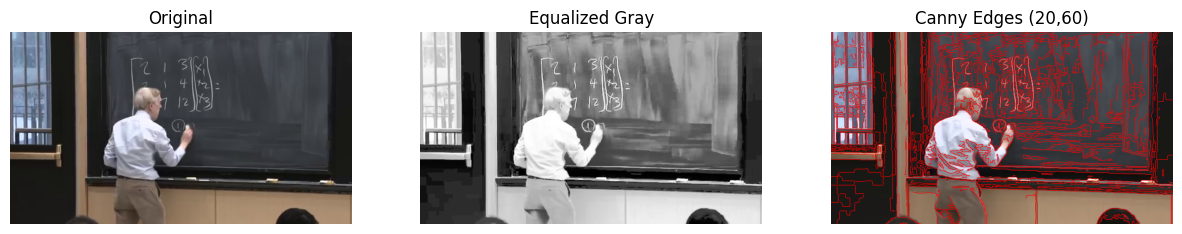

Saved edge visualization to /kaggle/working/canny_edges.png


In [12]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# ---- Load your test image ----
image_path = "/kaggle/working/video_frames/frame_0020.png"  # change as needed
frame = cv2.imread(image_path)
frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

# ---- Step 1: Convert to grayscale ----
gray = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2GRAY)

# ---- Step 2: Histogram equalization or gamma correction ----
# Option A: Equalize histogram (good for chalk/board contrast)
eq_gray = cv2.equalizeHist(gray)

# Option B: (optional) Gamma correction (uncomment to test)
# gamma = 1.2
# eq_gray = np.clip((gray / 255.0) ** (1 / gamma) * 255, 0, 255).astype(np.uint8)

# ---- Step 3: Apply Canny Edge Detection ----
edges = cv2.Canny(eq_gray, 20, 60)

# ---- Step 4: Merge with original or as a separate channel ----
# Example: overlay red edges on top of original RGB
edges_colored = frame_rgb.copy()
edges_colored[edges > 0] = [255, 0, 0]  # red overlay for visibility

# ---- Step 5: Visualize ----
plt.figure(figsize=(15,6))
plt.subplot(1,3,1); plt.imshow(frame_rgb); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(eq_gray, cmap='gray'); plt.title("Equalized Gray"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(edges_colored); plt.title("Canny Edges (20,60)"); plt.axis('off')
plt.show()

# ---- Step 6: Save edge map if needed ----
cv2.imwrite("/kaggle/working/canny_edges.png", edges)
print("Saved edge visualization to /kaggle/working/canny_edges.png")


### Laplacian filter

In [13]:
import cv2
import numpy as np
def gradient_map(img):
    gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    grad = cv2.magnitude(grad_x, grad_y)
    grad = cv2.normalize(grad, None, 0, 255, cv2.NORM_MINMAX)
    return cv2.cvtColor(grad.astype(np.uint8), cv2.COLOR_GRAY2RGB)
img = cv2.imread("/kaggle/working/video_frames/frame_0020.png")
gradient_map(img)


array([[[ 0,  0,  0],
        [33, 33, 33],
        [26, 26, 26],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 3,  3,  3],
        [33, 33, 33],
        [26, 26, 26],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 3,  3,  3],
        [32, 32, 32],
        [25, 25, 25],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [14, 14, 14],
        [32, 32, 32],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [14, 14, 14],
        [32, 32, 32],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [14, 14, 14],
        [32, 32, 32],
        [ 0,  0,  0]]], dtype=uint8)

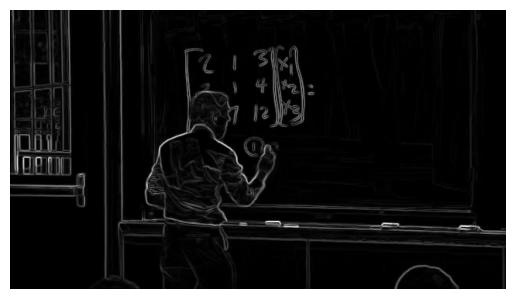

In [14]:
gradient_array = gradient_map(img)
def gradient_to_image(gradient_array, save_path=None):
    # Normalize gradients to 0–255
    grad_norm = cv2.normalize(gradient_array, None, 0, 255, cv2.NORM_MINMAX)
    grad_uint8 = grad_norm.astype(np.uint8)

    # Save if path given
    if save_path:
        cv2.imwrite(save_path, grad_uint8)

    return grad_uint8
grad_img = gradient_to_image(gradient_array, "gradient_0020.png")
import matplotlib.pyplot as plt

plt.imshow(grad_img, cmap='gray')
plt.axis('off')
plt.show()

In [17]:
# debug-safe hand-box writer (paste into the same environment where you ran the previous code)
# Assumes mediapipe already imported and hands created as before.

import os
import cv2
import mediapipe as mp
import imageio   # fallback writer

# ==== user set this ====
video_path = "/kaggle/input/lecture/short_vid.mp4"
out_path_cv2 = "output_hands_cv2.mp4"
out_path_imageio = "output_hands_imageio.mp4"
# =======================

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=False,
                       max_num_hands=2,
                       min_detection_confidence=0.5,
                       min_tracking_confidence=0.5)

# 1) open video
cap = cv2.VideoCapture(video_path)
print("cap.isOpened():", cap.isOpened())
if not cap.isOpened():
    raise RuntimeError(f"Cannot open video: {video_path!r}")

fps = cap.get(cv2.CAP_PROP_FPS) or 20.0
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT) or 0)
w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"Video info — fps: {fps}, frames: {frame_count}, size: {w}x{h}")

# 2) try cv2.VideoWriter first (ensure correct size / fps)
fourcc = cv2.VideoWriter_fourcc(*'avc1')  # try 'avc1' (mp4/h264). If that fails try 'mp4v' or 'XVID'
out_cv2 = cv2.VideoWriter(out_path_cv2, fourcc, fps, (w, h))
print("VideoWriter opened:", out_cv2.isOpened())

use_imageio_fallback = False
if not out_cv2.isOpened():
    print("cv2 VideoWriter failed to open — will fallback to imageio writer.")
    use_imageio_fallback = True

# 3) processing loop
frame_idx = 0
written_frames = 0

# If we will use imageio, open writer now (streaming)
if use_imageio_fallback:
    # install imageio-ffmpeg if needed (uncomment if not available)
    # !pip install imageio[ffmpeg]
    writer_img = imageio.get_writer(out_path_imageio, fps=fps, codec="libx264", macro_block_size=None)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_idx += 1

    # --- process frame: detect hand and draw adjusted bbox ---
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    result = hands.process(frame_rgb)

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            H, W, _ = frame.shape
            xs = [lm.x * W for lm in hand_landmarks.landmark]
            ys = [lm.y * H for lm in hand_landmarks.landmark]

            x_min, x_max = int(min(xs)), int(max(xs))
            y_min, y_max = int(min(ys)), int(max(ys))

            padding = 40
            shift_up = 25

            x_min = max(0, x_min - padding)
            y_min = max(0, y_min - padding - shift_up)
            x_max = min(W, x_max + padding)
            y_max = min(H, y_max + padding)

            # draw thin rectangle (BGR)
            cv2.rectangle(frame, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # --- write frame via chosen backend ---
    if not use_imageio_fallback:
        out_cv2.write(frame)
        written_frames += 1
    else:
        # imageio expects RGB
        writer_img.append_data(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
        written_frames += 1

    if frame_idx % 100 == 0:
        print(f"Processed {frame_idx}/{frame_count} frames...")

# 4) cleanup
cap.release()
if not use_imageio_fallback:
    out_cv2.release()
else:
    writer_img.close()

print(f"Processed total frames: {frame_idx}, written: {written_frames}")

# 5) print file size(s)
if os.path.exists(out_path_cv2):
    print("cv2 output:", out_path_cv2, "size:", os.path.getsize(out_path_cv2), "bytes")
if os.path.exists(out_path_imageio):
    print("imageio output:", out_path_imageio, "size:", os.path.getsize(out_path_imageio), "bytes")

# If both exist and cv2 file is tiny (bad), try using imageio result.
if os.path.exists(out_path_cv2) and os.path.getsize(out_path_cv2) < 1000:
    print("cv2 output tiny — consider using the imageio file (if present).")

print("Done.")

2025-10-30 16:12:41.061027: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761840761.229042      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761840761.282206      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
[ERROR:0@362.647] global cap_ffmpeg_impl.hpp:3207 open Could not find encoder for codec_id=27, error: Encoder not found
[ERROR:0@362.647] global cap_ffmpeg_impl.hpp:3285 open VIDEOIO/FFMPEG: Failed to initialize VideoWriter
W0000 00:00:1761840771.529706     168 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling suppo

cap.isOpened(): True
Video info — fps: 30.0, frames: 150, size: 852x480
VideoWriter opened: False
cv2 VideoWriter failed to open — will fallback to imageio writer.
Processed 100/150 frames...
Processed total frames: 150, written: 150
imageio output: output_hands_imageio.mp4 size: 279779 bytes
Done.


W0000 00:00:1761840921.219713     199 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1761840921.260004     199 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


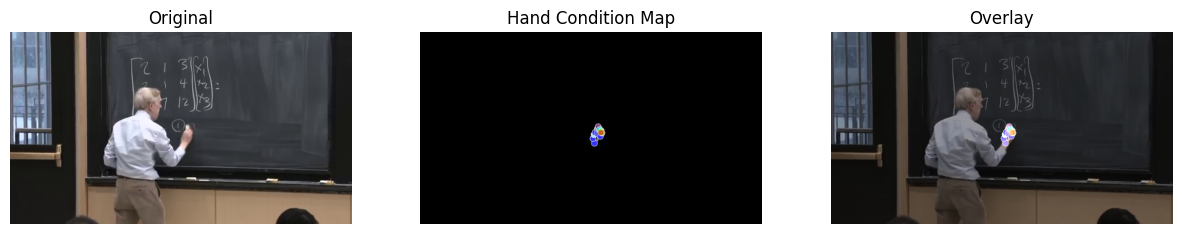

✅ Saved hand condition visualization → /kaggle/working/mediapipe_hand_condition.png


In [18]:
import mediapipe as mp
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# ----------------------------------------
# Config
# ----------------------------------------
image_path = "/kaggle/working/video_frames/frame_0020.png"  # change this to your frame path
output_path = "/kaggle/working/mediapipe_hand_condition.png"

# ----------------------------------------
# Setup Mediapipe Hands
# ----------------------------------------
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_styles = mp.solutions.drawing_styles

# Read image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# ----------------------------------------
# Run hand detection
# ----------------------------------------
with mp_hands.Hands(static_image_mode=True, max_num_hands=2, min_detection_confidence=0.4) as hands:
    results = hands.process(image_rgb)

# Blank canvas for hand landmarks
hand_condition = np.zeros_like(image_rgb)

# ----------------------------------------
# Draw detected hands on the blank canvas
# ----------------------------------------
if results.multi_hand_landmarks:
    for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            hand_condition,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_styles.get_default_hand_landmarks_style(),
            mp_styles.get_default_hand_connections_style(),
        )

# ----------------------------------------
# Combine / visualize
# ----------------------------------------
overlay = cv2.addWeighted(image_rgb, 0.6, hand_condition, 1.0, 0)
Image.fromarray(overlay).save(output_path)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1); plt.imshow(image_rgb); plt.title("Original"); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(hand_condition); plt.title("Hand Condition Map"); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(overlay); plt.title("Overlay"); plt.axis('off')
plt.show()

print(f"✅ Saved hand condition visualization → {output_path}")


# Run below code

In [10]:
!pip install mediapipe


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [5]:
import numpy as np
from PIL import Image
import os
from models.dwpose.preprocess import get_image_pose
from models.dwpose.util import draw_pose


def interpolate_linear(a, b, frac):
    a, b = np.array(a), np.array(b)
    m = min(len(a), len(b))
    return a[:m] * (1 - frac) + b[:m] * frac


def match_bodies(cand1, cand2, subset1, subset2):
    """Simple centroid-based matching between detected persons."""
    if len(subset1) == 0 or len(subset2) == 0:
        return np.arange(min(len(subset1), len(subset2)))

    def centroid(cand, subset):
        centers = []
        for s in subset:
            valid = s[s >= 0].astype(int)
            if len(valid) == 0:
                centers.append(np.array([0, 0]))
            else:
                pts = cand[valid]
                centers.append(pts[:, :2].mean(axis=0))
        return np.array(centers)

    c1, c2 = centroid(cand1, subset1), centroid(cand2, subset2)
    mapping = []
    for p in c1:
        dists = np.linalg.norm(c2 - p, axis=1)
        mapping.append(np.argmin(dists))
    return np.array(mapping[:len(subset1)])


def infer_poses_interp2(image1, image2, num_frames=13, save_pose_path=None):
    """
    Fully DW-Pose-compatible interpolation between two frames.
    Handles missing hands/faces and ensures valid 'score' shapes.
    """
    image1, image2 = np.array(image1), np.array(image2)
    H, W, _ = image1.shape

    pose_img1, pose1 = get_image_pose(image1)
    pose_img2, pose2 = get_image_pose(image2)

    bodies1, bodies2 = pose1["bodies"], pose2["bodies"]
    cand1, cand2 = bodies1["candidate"], bodies2["candidate"]
    subset1, subset2 = bodies1["subset"], bodies2["subset"]

    match_idx = match_bodies(cand1, cand2, subset1, subset2)
    subset2_matched = subset2[match_idx]
    cand2_matched = np.vstack([cand2[s.astype(int)] for s in subset2_matched]) if len(subset2_matched) else cand2

    joint_count = min(len(cand1), len(cand2_matched))
    interped_pose = [pose_img1.transpose((1, 2, 0))]

    for i in range(num_frames):
        frac = i / (num_frames - 1)

        # --- interpolate body joints ---
        interp_candidate = [
            interpolate_linear(c1, c2, frac)
            for c1, c2 in zip(cand1[:joint_count], cand2_matched[:joint_count])
        ]

        # --- safe score array (Npeople × Njoints >=18) ---
        num_people = max(1, len(subset1))
        num_joints = max(18, len(interp_candidate))
        score = np.ones((num_people, num_joints), dtype=np.float32) * 0.9

        # --- faces ---
        interp_faces = []
        if "faces" in pose1 and "faces" in pose2:
            for f1, f2 in zip(pose1["faces"], pose2["faces"]):
                interp_faces.append(interpolate_linear(f1, f2, frac))
        face_scores = [np.ones(len(f)) for f in interp_faces] if interp_faces else []

        # --- hands ---
        interp_hands = []
        if "hands" in pose1 and "hands" in pose2:
            for h1, h2 in zip(pose1["hands"], pose2["hands"]):
                interp_hands.append(interpolate_linear(h1, h2, frac))
        hand_scores = [np.ones(len(h)) for h in interp_hands] if interp_hands else []

        # --- assemble full structure ---
        frame_data = {
            "bodies": {
                "candidate": np.array(interp_candidate, dtype=np.float32),
                "subset": subset1,
                "score": score,
            },
            "faces": interp_faces,
            "faces_score": face_scores,
            "hands": interp_hands,
            "hands_score": hand_scores,
        }

        # --- draw and append ---
        interp_img = draw_pose(frame_data, H, W).transpose((1, 2, 0))
        interped_pose.append(interp_img)

    interped_pose.append(pose_img2.transpose((1, 2, 0)))

    # optional save
    if save_pose_path:
        os.makedirs(save_pose_path, exist_ok=True)
        for i, frame in enumerate(interped_pose):
            Image.fromarray(frame).save(os.path.join(save_pose_path, f"pose_{i:03d}.png"))

    return interped_pose


In [6]:
import os, cv2, torch
import numpy as np
from PIL import Image
import mediapipe as mp
from models.gluestick.models.two_view_pipeline import TwoViewPipeline
from models.gluestick import GLUESTICK_ROOT, batch_to_np, numpy_image_to_torch
from models.dwpose.preprocess import get_image_pose
from models.dwpose.util import draw_pose
from utils.util import interpolate_matches_linear, interpolate_linear


device = "cuda" if torch.cuda.is_available() else "cpu"

# ================================
# 1️⃣ Utility Functions
# ================================

def crop_and_resize(image, size=(1024, 576)):
    """Aspect-correct resize."""
    target_w, target_h = size
    w, h = image.size
    target_ratio, ratio = target_w/target_h, w/h
    if ratio > target_ratio:
        new_w = int(h * target_ratio)
        left = (w - new_w)//2; right = left + new_w
        top, bottom = 0, h
    else:
        new_h = int(w / target_ratio)
        top = (h - new_h)//2; bottom = top + new_h
        left, right = 0, w
    image = image.crop((left, top, right, bottom))
    return image.resize(size)

def gradient_map(img):
    gray = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2GRAY)
    grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    grad = cv2.magnitude(grad_x, grad_y)
    grad = cv2.normalize(grad, None, 0, 255, cv2.NORM_MINMAX)
    return cv2.cvtColor(grad.astype(np.uint8), cv2.COLOR_GRAY2RGB)

def compute_flow_farneback(img1, img2):
    """Dense optical flow (Farneback)."""
    if isinstance(img1, Image.Image): img1, img2 = np.array(img1), np.array(img2)
    g1, g2 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY), cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
    flow = cv2.calcOpticalFlowFarneback(g1, g2, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    return flow.astype(np.float32)

def flow_to_color(flow):
    fx, fy = flow[..., 0], flow[..., 1]
    mag, ang = cv2.cartToPolar(fx, fy, angleInDegrees=True)
    hsv = np.zeros((*flow.shape[:2], 3), dtype=np.uint8)
    hsv[..., 0] = (ang / 2).astype(np.uint8)
    hsv[..., 1] = 255
    hsv[..., 2] = np.clip((mag/(np.percentile(mag,98)+1e-9))*255, 0,255).astype(np.uint8)
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

def make_interpolated_flow_images(img1, img2, interp_frames=5):
    flow = compute_flow_farneback(img1, img2)
    flows = []
    for i in range(interp_frames):
        frac = i / max(1, interp_frames-1)
        scaled_flow = flow * frac
        flows.append(flow_to_color(scaled_flow))
    return flows

# ================================
# 2️⃣ DW-Pose & GlueStick
# ================================


# def infer_dwpose_interp(img1, img2, num_frames=5):
#     """
#     Safe DW-Pose interpolation that handles missing faces/hands/scores.
#     Returns list of interpolated pose images.
#     """
#     img1, img2 = np.array(img1), np.array(img2)
#     h, w, _ = img1.shape
#     pose1_img, pose1 = get_image_pose(img1)
#     pose2_img, pose2 = get_image_pose(img2)

#     # --- Ensure all keys exist ---
#     for pose in (pose1, pose2):
#         pose.setdefault("bodies", {"candidate": [], "subset": [], "score": []})
#         pose["bodies"].setdefault("score", [])
#         pose.setdefault("faces", [])
#         pose.setdefault("hands", [])

#     bodies1, bodies2 = pose1["bodies"], pose2["bodies"]
#     cand1, cand2 = bodies1.get("candidate", []), bodies2.get("candidate", [])
#     subset1, subset2 = bodies1.get("subset", []), bodies2.get("subset", [])
#     score1, score2 = bodies1.get("score", []), bodies2.get("score", [])

#     interped_pose = [pose1_img.transpose((1, 2, 0))]

#     for i in range(num_frames):
#         frac = i / max(1, num_frames - 1)

#         # --- interpolate candidates ---
#         interp_cand = []
#         for j in range(min(len(cand1), len(cand2))):
#             interp_cand.append(cand1[j] * (1 - frac) + cand2[j] * frac)

#         # --- interpolate scores (if available) ---
#         interp_score = []
#         for j in range(min(len(score1), len(score2))):
#             interp_score.append(score1[j] * (1 - frac) + score2[j] * frac)

#         # --- interpolate faces/hands only if both exist ---
#         interp_faces, interp_hands = [], []
#         if len(pose1.get("faces", [])) and len(pose2.get("faces", [])):
#             for f1, f2 in zip(pose1["faces"], pose2["faces"]):
#                 interp_faces.append(interpolate_linear(f1, f2, frac))
#         if len(pose1.get("hands", [])) and len(pose2.get("hands", [])):
#             for h1, h2 in zip(pose1["hands"], pose2["hands"]):
#                 interp_hands.append(interpolate_linear(h1, h2, frac))

#         # before frame_data construction
#         expected_len = 18
#         if len(interp_score) < expected_len:
#             interp_score.extend([[1.0]] * (expected_len - len(interp_score)))


#         frame_data = {
#             "bodies": {
#                 "candidate": interp_cand,
#                 "subset": subset1,
#                 "score": interp_score
#             },
#             "faces": interp_faces,
#             "hands": interp_hands,
#         }

#         img = draw_pose(frame_data, h, w).transpose((1, 2, 0))
#         interped_pose.append(img)

#     interped_pose.append(pose2_img.transpose((1, 2, 0)))
#     return interped_pose



def infer_poses_interp(image1, image2, num_frames=13, save_pose_path=None):

    image1 = np.array(image1)
    image2 = np.array(image2)
    height, width, _ = image1.shape
    pose_image, pose1 = get_image_pose(image1)
    pose_image2, pose2 = get_image_pose(image2)

    bodies1 = pose1['bodies']
    candidate1 = bodies1['candidate']
    subset1 = bodies1['subset']
    bodies2 = pose2['bodies']
    candidate2 = bodies2['candidate']
    subset2 = bodies2['subset']
    new_match = match_bodies(candidate1, candidate2, subset1, subset2)
    interped_pose = [pose_image.transpose((1, 2, 0))]
    numbers = np.arange(min(len(candidate1), len(candidate2)))
    subset = np.array(np.split(numbers, min(len(subset1), len(subset2))))
    candidate2_idx = np.concatenate(subset[new_match])
    candidate2 = candidate2[candidate2_idx]
    for i in range(num_frames):
        frac = i / (num_frames - 1) 
        
        interp_candidate = [interpolate_linear(c1, c2, frac) for c1, c2 in zip(candidate1, candidate2)] 
        interp_faces = [interpolate_linear(f1, f2, frac) for f1, f2 in zip(pose1['faces'], pose2['faces'][new_match])]
        hands_match = new_match + [x + len(new_match) for x in new_match]
        interp_hands = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['hands'], pose2['hands'][hands_match])]


        interp_hands_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['hands_score'], pose2['hands_score'][hands_match])]
        interp_faces_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['faces_score'], pose2['faces_score'][new_match])]
        interp_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(bodies1['score'], bodies2['score'][new_match])]


        frame_data = {
            'bodies': {
                'candidate': interp_candidate,
                'subset': subset,
                'score': interp_score
            },
            'faces': interp_faces,
            'faces_score': interp_faces_score,
            'hands': interp_hands,
            'hands_score':interp_hands_score
        }
    

        interp_image = draw_pose(frame_data, height, width).transpose((1, 2, 0))
        interped_pose.append(interp_image)
    interped_pose.append(pose_image2.transpose((1, 2, 0)))
    if save_pose_path:
        for i in range(len(interped_pose)):
            Image.fromarray(interped_pose[i]).save(os.path.join(save_pose_path, 'pose{:02d}.png'.format(i)))

    return interped_pose



# def infer_poses_interp(image1, image2, num_frames=13, save_pose_path=None):

#     image1 = np.array(image1)
#     image2 = np.array(image2)
#     height, width, _ = image1.shape
#     pose_image, pose1 = get_image_pose(image1)
#     pose_image2, pose2 = get_image_pose(image2)

#     bodies1 = pose1['bodies']
#     candidate1 = bodies1['candidate']
#     subset1 = bodies1['subset']
#     bodies2 = pose2['bodies']
#     candidate2 = bodies2['candidate']
#     subset2 = bodies2['subset']
#     new_match = match_bodies(candidate1, candidate2, subset1, subset2)
#     interped_pose = [pose_image.transpose((1, 2, 0))]
#     numbers = np.arange(min(len(candidate1), len(candidate2)))
#     subset = np.array(np.split(numbers, min(len(subset1), len(subset2))))
#     candidate2_idx = np.concatenate(subset[new_match])
#     candidate2 = candidate2[candidate2_idx]
#     for i in range(num_frames):
#         frac = i / (num_frames - 1) 
        
#         interp_candidate = [interpolate_linear(c1, c2, frac) for c1, c2 in zip(candidate1, candidate2)] 
#         interp_faces = [interpolate_linear(f1, f2, frac) for f1, f2 in zip(pose1['faces'], pose2['faces'][new_match])]
#         hands_match = new_match + [x + len(new_match) for x in new_match]
#         interp_hands = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['hands'], pose2['hands'][hands_match])]


#         interp_hands_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['hands_score'], pose2['hands_score'][hands_match])]
#         interp_faces_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(pose1['faces_score'], pose2['faces_score'][new_match])]
#         interp_score = [interpolate_linear(h1, h2, frac) for h1, h2 in zip(bodies1['score'], bodies2['score'][new_match])]


#         frame_data = {
#             'bodies': {
#                 'candidate': interp_candidate,
#                 'subset': subset,
#                 'score': interp_score
#             },
#             'faces': interp_faces,
#             'faces_score': interp_faces_score,
#             'hands': interp_hands,
#             'hands_score':interp_hands_score
#         }
    

#         interp_image = draw_pose(frame_data, height, width).transpose((1, 2, 0))
#         interped_pose.append(interp_image)
#     interped_pose.append(pose_image2.transpose((1, 2, 0)))
#     if save_pose_path:
#         for i in range(len(interped_pose)):
#             Image.fromarray(interped_pose[i]).save(os.path.join(save_pose_path, 'pose{:02d}.png'.format(i)))

#     return interped_pose





# def infer_gluestick_interp(glue_model, image1, image2, interp_frames=5):
#     gray0, gray1 = np.array(image1.convert('L')), np.array(image2.convert('L'))
#     torch_gray0, torch_gray1 = numpy_image_to_torch(gray0), numpy_image_to_torch(gray1)
#     torch_gray0, torch_gray1 = torch_gray0.to(device)[None], torch_gray1.to(device)[None]
#     x = {'image0': torch_gray0, 'image1': torch_gray1}
#     pred = glue_model(x); pred = batch_to_np(pred)
#     line_seg0, line_seg1 = pred["lines0"], pred["lines1"]
#     matches = pred["line_matches0"]
#     valid = matches != -1
#     match_idx = matches[valid]
#     matched0, matched1 = line_seg0[valid], line_seg1[match_idx]
#     imgs = []
#     img0 = cv2.cvtColor(gray0, cv2.COLOR_GRAY2BGR)
#     for i in range(interp_frames):
#         frac = i / (interp_frames-1)
#         interp = interpolate_matches_linear(matched0, matched1, frac)
#         out = np.zeros_like(img0)
#         for l in interp:
#             x1,y1,x2,y2 = map(int, l)
#             cv2.line(out, (x1,y1), (x2,y2), (0,255,0), 1)
#         imgs.append(out)
#     return imgs



def infer_gluestick_interp(glue_model, image1, image2, interp_frames=5):
    """Interpolates structural line matches between two images using GlueStick."""
    gray0, gray1 = np.array(image1.convert('L')), np.array(image2.convert('L'))

    torch_gray0, torch_gray1 = numpy_image_to_torch(gray0), numpy_image_to_torch(gray1)
    torch_gray0, torch_gray1 = torch_gray0.to(device)[None], torch_gray1.to(device)[None]
    x = {'image0': torch_gray0, 'image1': torch_gray1}
    pred = glue_model(x)
    pred = batch_to_np(pred)

    line_seg0, line_seg1 = pred["lines0"], pred["lines1"]
    matches = pred["line_matches0"]
    valid = matches != -1
    match_idx = matches[valid]
    matched0, matched1 = line_seg0[valid], line_seg1[match_idx]

    img0 = cv2.cvtColor(gray0, cv2.COLOR_GRAY2BGR)
    imgs = []

    for i in range(interp_frames):
        frac = i / (interp_frames - 1)
        interp = interpolate_matches_linear(matched0, matched1, frac)
        out = np.zeros_like(img0)

        for l in interp:
            # Ensure line shape (4,) or reshape if needed
            l = np.array(l).flatten()
            if len(l) == 4:
                x1, y1, x2, y2 = map(int, l)
            elif l.shape == (2, 2):
                (x1, y1), (x2, y2) = l.astype(int)
            else:
                continue  # skip malformed lines
            # Skip NaNs
            if np.isnan([x1, y1, x2, y2]).any():
                continue
            cv2.line(out, (x1, y1), (x2, y2), (0, 255, 0), 1)

        imgs.append(out)
    return imgs


# ================================
# 3️⃣ MediaPipe Hands + Bounding Box
# ================================

def mediapipe_hand_bbox_map(image, return_bbox=True):
    mp_hands = mp.solutions.hands
    mp_drawing = mp.solutions.drawing_utils
    image_rgb = np.array(image)
    cond = np.zeros_like(image_rgb)
    bbox_list = []
    with mp_hands.Hands(static_image_mode=True,max_num_hands=2,min_detection_confidence=0.4) as hands:
        res = hands.process(image_rgb)
        if res.multi_hand_landmarks:
            H,W,_ = image_rgb.shape
            for hand in res.multi_hand_landmarks:
                xs=[lm.x*W for lm in hand.landmark]; ys=[lm.y*H for lm in hand.landmark]
                x1,x2=int(min(xs)),int(max(xs)); y1,y2=int(min(ys)),int(max(ys))
                pad=40
                x1,y1=max(0,x1-pad),max(0,y1-pad)
                x2,y2=min(W,x2+pad),min(H,y2+pad)
                bbox_list.append((x1,y1,x2,y2))
                mp_drawing.draw_landmarks(cond, hand, mp_hands.HAND_CONNECTIONS)
    if return_bbox:
        return cond, bbox_list
    return cond

# ================================
# 4️⃣ Fusion (BBox Weighted)
# ================================

# def fuse_conditions_bbox_weighted(glue_imgs, pose_imgs, hand_imgs, lap_imgs, flow_imgs, bbox_list_all):
#     fused=[]
#     n = min(len(glue_imgs), len(pose_imgs))
#     for i in range(n):
#         base = glue_imgs[i].astype(np.float32)
#         pose = pose_imgs[i].astype(np.float32)
#         hand = hand_imgs[i].astype(np.float32)
#         lap = lap_imgs[i].astype(np.float32)
#         flow = flow_imgs[i].astype(np.float32)
#         H,W,_ = base.shape
#         fusion = 0.3*base + 0.3*pose + 0.2*hand + 0.1*lap + 0.1*flow

#         mask = np.zeros((H,W,1),dtype=np.float32)
#         for (x1,y1,x2,y2) in bbox_list_all[i]:
#             mask[y1:y2,x1:x2]=1.0
#         fusion = fusion*(1+0.7*mask)
#         fusion = np.clip(fusion,0,255).astype(np.uint8)
#         fused.append(Image.fromarray(fusion))
#     return fused



import numpy as np
from PIL import Image
import cv2

def fuse_conditions_bbox_weighted(match_imgs, pose_imgs, hand_imgs=None, lap_imgs=None, flow_imgs=None, bbox_list_all=None):
    """
    Fuse multiple condition maps (GlueStick, DWpose, Hand, Laplacian, Flow)
    with different weights inside vs outside bounding box regions.

    Args:
        match_imgs: list[np.ndarray] - GlueStick structural maps
        pose_imgs: list[np.ndarray]  - DWpose maps
        hand_imgs: list[np.ndarray]  - MediaPipe hand maps (optional)
        lap_imgs: list[np.ndarray]   - Laplacian/gradient maps (optional)
        flow_imgs: list[np.ndarray]  - Optical flow visualizations (optional)
        bbox_list_all: list[list[tuple]] - List of bbox coords [(x1,y1,x2,y2)] for each frame

    Returns:
        fused_images: list[PIL.Image.Image] - final fused condition maps
    """
    fused_images = []
    N = min(len(match_imgs), len(pose_imgs))

    for i in range(N):
        # Convert to float32 arrays
        base = match_imgs[i].astype(np.float32)
        pose = pose_imgs[i].astype(np.float32)
        hand = hand_imgs[i].astype(np.float32) if hand_imgs is not None else np.zeros_like(base)
        lap  = lap_imgs[i].astype(np.float32)  if lap_imgs is not None else np.zeros_like(base)
        flow = flow_imgs[i].astype(np.float32) if flow_imgs is not None else np.zeros_like(base)

        H, W, _ = base.shape
        mask = np.zeros((H, W, 1), dtype=np.float32)

        # Create bounding box mask
        if bbox_list_all and i < len(bbox_list_all):
            for (x1, y1, x2, y2) in bbox_list_all[i]:
                mask[y1:y2, x1:x2] = 1.0

        # --- Vectorized inside/outside weighting ---
        inside_weights  = np.array([0.15, 0.2, 0.2, 0.35, 0.1], dtype=np.float32)  # [base, pose, hand, lap, flow]
        outside_weights = np.array([0.35, 0.35, 0.2, 0.05, 0.05], dtype=np.float32)

        # Stack conditions to apply weighting efficiently
        cond_stack = np.stack([base, pose, hand, lap, flow], axis=-1)  # shape: (H, W, 3, 5)

        # Mask shape alignment
        mask_exp = np.repeat(mask, 3, axis=2)[..., None]  # (H, W, 3, 1)

        # Weighted sum (element-wise blend)
        fusion = (
            (1 - mask_exp) * (cond_stack * outside_weights.reshape(1, 1, 1, 5))
            + mask_exp * (cond_stack * inside_weights.reshape(1, 1, 1, 5))
        ).sum(axis=-1)  # sum across condition dimension

        # Normalize and convert back to uint8
        fusion = np.clip(fusion, 0, 255).astype(np.uint8)

        fused_images.append(Image.fromarray(fusion))

    return fused_images




# ================================
# 5️⃣ Main Entry
# ================================

def generate_fused_conditions(image1_path, image2_path, interp_frames, output_dir="./fused_conditions"):
    os.makedirs(output_dir, exist_ok=True)
    img1, img2 = Image.open(image1_path).convert("RGB"), Image.open(image2_path).convert("RGB")
    img1, img2 = crop_and_resize(img1), crop_and_resize(img2)

    # load GlueStick model once
    glue_conf = {
        'name':'two_view_pipeline','use_lines':True,
        'extractor':{'name':'wireframe','sp_params':{'force_num_keypoints':False,'max_num_keypoints':1000},
                     'wireframe_params':{'merge_points':True,'merge_line_endpoints':True},'max_n_lines':300},
        'matcher':{'name':'gluestick',
                   'weights':str(GLUESTICK_ROOT/'resources'/'weights'/'checkpoint_GlueStick_MD.tar'),'trainable':False}
    }
    glue_model = TwoViewPipeline(glue_conf).to(device).eval()

    glue_imgs = infer_gluestick_interp(glue_model,img1,img2,interp_frames)
    pose_imgs = infer_poses_interp2(img1, img2, interp_frames)
    flow_imgs = make_interpolated_flow_images(img1,img2,interp_frames)

    hand_imgs,bbox_list_all,lap_imgs=[],[],[]

    for i in range(interp_frames):
        # generate blended frame
        blend = Image.fromarray(((1-i/interp_frames)*np.array(img1)+(i/interp_frames)*np.array(img2)).astype(np.uint8))
        hmap,bboxes = mediapipe_hand_bbox_map(blend,return_bbox=True)
        hand_imgs.append(hmap); bbox_list_all.append(bboxes)
        lap_imgs.append(gradient_map(blend))

    fused = fuse_conditions_bbox_weighted(glue_imgs,pose_imgs,hand_imgs,lap_imgs,flow_imgs,bbox_list_all)
    for idx,img in enumerate(fused):
        img.save(os.path.join(output_dir,f"cond_{idx:03d}.png"))
    print(f"✅ Saved {len(fused)} fused condition frames → {output_dir}")
    return fused


In [17]:
!ls /home/ie643_visionforge/venv/'Untitled Folder'/test_frames

frame_0020.png	frame_0021.png


Below Code Genrates Frames as Output

In [22]:
from pathlib import Path

image1_path = "/home/ie643_visionforge/venv/Untitled Folder/test_frames/frame_0020.png"
image2_path = "/home/ie643_visionforge/venv/Untitled Folder/test_frames/frame_0021.png"


output_dir = Path("/home/ie643_visionforge/venv/Untitled Folder/test_frames/fused")

fused_conditions = generate_fused_conditions(
    image1_path=image1_path,
    image2_path=image2_path,
    interp_frames= 9, #Key Frames+Intermediate Frames
    output_dir=output_dir
)


W0000 00:00:1761994247.339302  683140 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1761994247.357778  683140 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1761994247.785367  683164 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1761994247.803493  683189 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1761994247.892543  683203 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1761994247.913118  683203 inference_feedback_manager.cc:114] Feedback manager 

✅ Saved 9 fused condition frames → /home/ie643_visionforge/venv/Untitled Folder/test_frames/fused


Below Code has input as conditional Frames and Outputs the realistic Video

In [26]:
import os
import torch
from PIL import Image
from diffusers.utils import export_to_video
from diffusers import AutoencoderKLTemporalDecoder
from transformers import CLIPVisionModelWithProjection
from safetensors.torch import load_file

from models.controlnext_vid_svd import ControlNeXtSDVModel
from models.unet_spatio_temporal_condition_controlnext import UNetSpatioTemporalConditionControlNeXtModel
from pipeline.pipeline_FCVG import StableVideoDiffusionPipelineControlNeXtReverse


# ----------------------------
# Configurations
# ----------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"
PRETRAINED_MODEL = "stabilityai/stable-video-diffusion-img2vid-xt-1-1"

CONTROLNEXT_PATH = "./checkpoints/controlnext.safetensors"
UNET_PATH = "./checkpoints/unet.safetensors"

image1_path = "/home/ie643_visionforge/venv/Untitled Folder/test_frames/frame_0020.png"
image2_path = "/home/ie643_visionforge/venv/Untitled Folder/test_frames/frame_0021.png"
fused_dir   = "/home/ie643_visionforge/venv/Untitled Folder/test_frames/fused"     # folder containing cond_*.png
save_dir    = "/home/ie643_visionforge/venv/Untitled Folder/test_frames/"
os.makedirs(save_dir, exist_ok=True)

MAX_FRAME_NUM = len([f for f in os.listdir(fused_dir) if f.endswith(".png")])
WIDTH, HEIGHT = 1024, 576
CONTROL_WEIGHT = 1.0
GUIDANCE_MIN, GUIDANCE_MAX = 3.0, 3.0
FPS = 7


# ----------------------------
# Load the pretrained pipeline
# ----------------------------
print("🚀 Loading pretrained models ...")

unet = UNetSpatioTemporalConditionControlNeXtModel.from_pretrained(PRETRAINED_MODEL, subfolder="unet")
controlnext = ControlNeXtSDVModel()
controlnext.load_state_dict(load_file(CONTROLNEXT_PATH))
unet.load_state_dict(load_file(UNET_PATH), strict=False)

vae = AutoencoderKLTemporalDecoder.from_pretrained(PRETRAINED_MODEL, subfolder="vae")
image_encoder = CLIPVisionModelWithProjection.from_pretrained(PRETRAINED_MODEL, subfolder="image_encoder")

pipe = StableVideoDiffusionPipelineControlNeXtReverse.from_pretrained(
    PRETRAINED_MODEL,
    controlnext=controlnext,
    unet=unet,
    vae=vae,
    image_encoder=image_encoder,
)
pipe.enable_model_cpu_offload()
print("✅ Pipeline ready.")


# ----------------------------
# Load keyframes & conditions
# ----------------------------
print("📂 Loading input frames & conditions ...")
image1 = Image.open(image1_path).convert("RGB").resize((WIDTH, HEIGHT))
image2 = Image.open(image2_path).convert("RGB").resize((WIDTH, HEIGHT))

condition_images = [
    Image.open(os.path.join(fused_dir, f)).convert("RGB").resize((WIDTH, HEIGHT))
    for f in sorted(os.listdir(fused_dir)) if f.endswith(".png")
]

print(f"🧩 {len(condition_images)} condition frames loaded.")


# ----------------------------
# Run diffusion inference
# ----------------------------
print(f"🎬 Generating {MAX_FRAME_NUM} intermediate frames ...")

video_frames = pipe(
    image1,
    image2,
    condition_images[:MAX_FRAME_NUM],
    decode_chunk_size=2,
    num_frames=MAX_FRAME_NUM,
    motion_bucket_id=127.0,
    fps=FPS,
    control_weight=CONTROL_WEIGHT,
    width=WIDTH,
    height=HEIGHT,
    min_guidance_scale=GUIDANCE_MIN,
    max_guidance_scale=GUIDANCE_MAX,
    frames_per_batch=MAX_FRAME_NUM,
    num_inference_steps=25,
    overlap=6,
).frames

flattened = [img for sublist in video_frames for img in sublist]

# ----------------------------
# Save results
# ----------------------------
for i, frame in enumerate(flattened):
    frame.save(os.path.join(save_dir, f"frame_{i:03d}.png"))

video_path = os.path.join(save_dir, "interpolated.mp4")
export_to_video(flattened, video_path, fps=FPS)
print(f"✅ Saved {len(flattened)} frames and final video → {video_path}")


🚀 Loading pretrained models ...


Loading pipeline components...: 100%|█████████████| 5/5 [00:00<00:00,  5.75it/s]


✅ Pipeline ready.
📂 Loading input frames & conditions ...
🧩 9 condition frames loaded.
🎬 Generating 9 intermediate frames ...


100%|███████████████████████████████████████████| 25/25 [04:34<00:00, 11.00s/it]


✅ Saved 9 frames and final video → /home/ie643_visionforge/venv/Untitled Folder/test_frames/interpolated.mp4


# Till Here

Below code is working but create double skeletons

In [55]:
# import numpy as np
# from PIL import Image
# import os
# from models.dwpose.preprocess import get_image_pose
# from models.dwpose.util import draw_pose

# # -----------------------------------------------------------
# # Helper: linear interpolation
# # -----------------------------------------------------------
# def interpolate_linear(a, b, frac):
#     a, b = np.array(a), np.array(b)
#     m = min(len(a), len(b))
#     return a[:m] * (1 - frac) + b[:m] * frac

# # -----------------------------------------------------------
# # Helper: naive body matcher
# # -----------------------------------------------------------
# def match_bodies(cand1, cand2, subset1, subset2):
#     """
#     Match people across two frames using nearest centroid distance.
#     Returns index mapping list for subset2 -> subset1.
#     """
#     if len(subset1) == 0 or len(subset2) == 0:
#         return np.arange(min(len(subset1), len(subset2)))

#     # compute person centroids
#     def centroid(cand, subset):
#         centers = []
#         for s in subset:
#             pts = cand[s.astype(int)]
#             pts = pts[pts[:, 0] > 0]  # valid points only
#             if len(pts) == 0:
#                 centers.append(np.array([0, 0]))
#             else:
#                 centers.append(pts[:, :2].mean(axis=0))
#         return np.array(centers)

#     c1 = centroid(cand1, subset1)
#     c2 = centroid(cand2, subset2)

#     match = []
#     for i, p in enumerate(c1):
#         dists = np.linalg.norm(c2 - p, axis=1)
#         match.append(np.argmin(dists))
#     return np.array(match[:len(subset1)])

# # -----------------------------------------------------------
# # Main DW-Pose interpolation
# # -----------------------------------------------------------
# def infer_poses_interp(image1, image2, num_frames=13, save_pose_path=None):
#     """
#     Interpolates DW-Pose keypoints (body, faces, hands) between two frames.
#     Reconstructs full pose dict manually and draws intermediate images.
#     """
#     image1, image2 = np.array(image1), np.array(image2)
#     H, W, _ = image1.shape

#     pose_img1, pose1 = get_image_pose(image1)
#     pose_img2, pose2 = get_image_pose(image2)

#     bodies1, bodies2 = pose1["bodies"], pose2["bodies"]
#     cand1, cand2 = bodies1["candidate"], bodies2["candidate"]
#     subset1, subset2 = bodies1["subset"], bodies2["subset"]

#     new_match = match_bodies(cand1, cand2, subset1, subset2)
#     interped_pose = [pose_img1.transpose((1, 2, 0))]

#     numbers = np.arange(min(len(cand1), len(cand2)))
#     subset = np.array(np.split(numbers, min(len(subset1), len(subset2))))
#     cand2_idx = np.concatenate(subset[new_match])
#     cand2 = cand2[cand2_idx]

#     for i in range(num_frames):
#         frac = i / (num_frames - 1)

#         # ---- bodies ----
#         interp_candidate = [interpolate_linear(c1, c2, frac)
#                             for c1, c2 in zip(cand1, cand2)]
#         interp_score = [interpolate_linear(s1, s2, frac)
#                         for s1, s2 in zip(bodies1["score"], bodies2["score"][new_match])]

#         # ---- faces ----
#         interp_faces, interp_faces_score = [], []
#         if "faces" in pose1 and "faces" in pose2:
#             for f1, f2 in zip(pose1["faces"], pose2["faces"]):
#                 interp_faces.append(interpolate_linear(f1, f2, frac))
#             if "faces_score" in pose1 and "faces_score" in pose2:
#                 interp_faces_score = [
#                     interpolate_linear(s1, s2, frac)
#                     for s1, s2 in zip(pose1["faces_score"], pose2["faces_score"])
#                 ]

#         # ---- hands ----
#         interp_hands, interp_hands_score = [], []
#         if "hands" in pose1 and "hands" in pose2:
#             for h1, h2 in zip(pose1["hands"], pose2["hands"]):
#                 interp_hands.append(interpolate_linear(h1, h2, frac))
#             if "hands_score" in pose1 and "hands_score" in pose2:
#                 interp_hands_score = [
#                     interpolate_linear(s1, s2, frac)
#                     for s1, s2 in zip(pose1["hands_score"], pose2["hands_score"])
#                 ]

#         frame_data = {
#             "bodies": {"candidate": interp_candidate, "subset": subset, "score": interp_score},
#             "faces": interp_faces,
#             "faces_score": interp_faces_score,
#             "hands": interp_hands,
#             "hands_score": interp_hands_score,
#         }

#         interp_image = draw_pose(frame_data, H, W).transpose((1, 2, 0))
#         interped_pose.append(interp_image)

#     interped_pose.append(pose_img2.transpose((1, 2, 0)))

#     if save_pose_path:
#         os.makedirs(save_pose_path, exist_ok=True)
#         for i, frame in enumerate(interped_pose):
#             Image.fromarray(frame).save(os.path.join(save_pose_path, f"pose_{i:03d}.png"))

#     return interped_pose


In [7]:
%cd FCVG

[Errno 2] No such file or directory: 'FCVG'
/home/ie643_visionforge/venv/Untitled Folder/FCVG


/home/ie643_visionforge/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


Stiches The conditional frames to make video

In [80]:
import cv2, os
from glob import glob

frames = sorted(glob(str(output_dir / "cond_*.png")))
video_path = str(output_dir / "fused_preview.mp4")
fps = 7

if frames:
    h, w, _ = cv2.imread(frames[0]).shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(video_path, fourcc, fps, (w, h))
    for f in frames:
        out.write(cv2.imread(f))
    out.release()
    print(f"🎞️ Preview video saved to {video_path}")


🎞️ Preview video saved to /kaggle/working/fused_conditions/fused_preview.mp4


#Upsampled Video with Conditions Included

In [ ]:
print('Hi')

In [3]:
# FCVG Upsampling with Extra Conditions
# TODO: integrate GlueStick, DW-Pose, Optical Flow, Gradient maps
# This template will be filled by assistant progressively.

import os, cv2, torch
import numpy as np
from PIL import Image
from diffusers.utils import export_to_video
from diffusers import AutoencoderKLTemporalDecoder
from transformers import CLIPVisionModelWithProjection
from safetensors.torch import load_file

# Model loaders & utilities will be inserted here

if __name__ == "__main__":
    # 1. Load downsampled video
    # 2. Extract frames
    # 3. Interpolate GlueStick, DW-Pose, Flow, Gradient maps
    # 4. Fuse control maps
    # 5. Run SVD pipeline
    # 6. Save final upsampled video
    pass


🚀 Loading models once...


/home/ie643_visionforge/venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Loading pipeline components...: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 15.38it/s]


✅ Models loaded successfully
✅ Extracted 50 frames

🎬 Interpolating between frame 0 and 1
  ├─ GlueStick matching...
  ├─ DW-Pose interpolation...
  ├─ Optical flow...
  ├─ Hand detection & gradients...


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1762020092.889537  999261 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762020092.937274  999238 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762020092.986877  999236 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.
W0000 00:00:1762020093.138681  999283 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762020093.185555  999277 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:

  ├─ Fusing conditions...
  └─ Running diffusion inference...


  0%|                                                                                                                                                                 | 0/25 [00:00<?, ?it/s]/home/ie643_visionforge/venv/lib/python3.10/site-packages/diffusers/models/downsampling.py:135: FutureWarning: `scale` is deprecated and will be removed in version 1.0.0. The `scale` argument is deprecated and will be ignored. Please remove it, as passing it will raise an error in the future. `scale` should directly be passed while calling the underlying pipeline component i.e., via `cross_attention_kwargs`.
  deprecate("scale", "1.0.0", deprecation_message)
  0%|                                                                                                                                                                 | 0/25 [00:15<?, ?it/s]


OutOfMemoryError: CUDA out of memory. Tried to allocate 630.00 MiB. GPU 0 has a total capacity of 23.53 GiB of which 191.75 MiB is free. Process 612197 has 12.46 GiB memory in use. Including non-PyTorch memory, this process has 10.86 GiB memory in use. Of the allocated memory 9.42 GiB is allocated by PyTorch, and 1010.89 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [20]:
!ls


checkpoints			  models	    tmp_upscale_run
demo_FCVG.py			  output_fcvg	    Untitled.ipynb
demo.sh				  pipeline	    untitled.txt
downtoupconditioned.py		  README.md	    utils
efficient_video_interpolation.py  requirements.txt
inference.py			  run.log


In [21]:
import os
import cv2
import torch
from PIL import Image
from tqdm import tqdm
from diffusers import ControlNetModel, StableDiffusionControlNetPipeline
from safetensors.torch import load_file
from diffusers.utils import export_to_video

# ----------------------------
# CONFIG
# ----------------------------
device = "cuda" if torch.cuda.is_available() else "cpu"

VIDEO_PATH = "/home/ie643_visionforge/venv/Untitled Folder/last_downsampled_5.mp4"      # input video
OUT_DIR = "/home/ie643_visionforge/venv/Untitled Folder/upsampled_last.mp4"   # outputs
COND_DIR = "./tmp_conditions"         # temporary condition folder
os.makedirs(OUT_DIR, exist_ok=True)
os.makedirs(COND_DIR, exist_ok=True)

TARGET_FPS = 30  # output fps
UPSAMPLE_FACTOR = 4  # if input fps=7.5, output becomes 30fps

CONTROLNET_PATH = "./checkpoints/controlnet.safetensors"
UNET_PATH       = "./checkpoints/unet.safetensors"

WIDTH, HEIGHT = 1024, 576
GUIDANCE = 3.0
STEPS = 25
CONTROL_WEIGHT = 1.0

# ----------------------------
# LOAD MODEL
# ----------------------------
print("🚀 Loading ControlNet + UNet + SD...")
controlnet = ControlNetModel.from_pretrained(
    "lllyasviel/control_v11p_sd15_openpose", torch_dtype=torch.float16
)
controlnet.load_state_dict(load_file(CONTROLNET_PATH))

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    controlnet=controlnet,
    torch_dtype=torch.float16
)

pipe.unet.load_state_dict(load_file(UNET_PATH), strict=False)
pipe = pipe.to(device)
pipe.enable_xformers_memory_efficient_attention()

print("✅ Model Ready")


# ----------------------------
# STEP 1: Extract frames from input video
# ----------------------------
print("🎞 Extracting frames...")
cap = cv2.VideoCapture(VIDEO_PATH)
frames = []
while True:
    ret, frame = cap.read()
    if not ret: break
    frame = cv2.resize(frame, (WIDTH, HEIGHT))
    frames.append(frame)

cap.release()
print(f"📌 Input frames: {len(frames)}")


# ----------------------------
# Placeholder: your condition generator
# Replace with your actual function
# ----------------------------
def generate_condition_images(frameA, frameB):
    # --- YOU MUST PUT YOUR CONDITION CODE HERE ---
    # Should save condition images into COND_DIR

    # EXAMPLE dummy: save grayscale blend (replace!)
    imgA = cv2.cvtColor(frameA, cv2.COLOR_BGR2GRAY)
    imgB = cv2.cvtColor(frameB, cv2.COLOR_BGR2GRAY)
    blend = cv2.addWeighted(imgA, 0.5, imgB, 0.5, 0)

    fname = os.path.join(COND_DIR, "cond.png")
    cv2.imwrite(fname, blend)

    return [fname]  # list of generated condition images


# ----------------------------
# STEP 2: Loop through frame pairs & generate interpolations
# ----------------------------
final_frames = []

print("🎬 Generating higher-fps video...")
for i in tqdm(range(len(frames)-1)):

    frame1 = frames[i]
    frame2 = frames[i+1]

    # Save keyframes
    im1 = Image.fromarray(cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB))
    final_frames.append(im1)

    # Generate control frames
    cond_imgs = generate_condition_images(frame1, frame2)

    for c_path in cond_imgs:

        control = Image.open(c_path).convert("RGB").resize((WIDTH, HEIGHT))
        prompt = ""  # your prompt, optional

        out = pipe(
            prompt=prompt,
            image=control,
            guidance_scale=GUIDANCE,
            num_inference_steps=STEPS,
        ).images[0]

        final_frames.append(out)


# ----------------------------
# STEP 3: Save output video
# ----------------------------
print("📀 Writing video...")
video_path = "./final_upscaled.mp4"
export_to_video(final_frames, video_path, fps=TARGET_FPS)

print(f"✅ Done! Saved video → {video_path}")


/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


RuntimeError: Failed to import diffusers.pipelines.controlnet.pipeline_controlnet because of the following error (look up to see its traceback):
Failed to import diffusers.loaders.ip_adapter because of the following error (look up to see its traceback):
cannot import name 'SiglipImageProcessor' from 'transformers' (/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/__init__.py)

In [31]:
!ls

checkpoints			  helpers	    results
demo_FCVG.py			  inference.py	    run.log
demo.sh				  models	    tmp_upscale_run
downtoupconditioned.py		  output_fcvg	    Untitled.ipynb
efficient_video_interpolation.py  pipeline	    untitled.txt
example				  README.md	    utils
Folder				  requirements.txt


In [44]:
import inspect, helpers.helper as h

gluestick = h.infer_gluestick_interp


AttributeError: module 'helpers.helper' has no attribute 'infer_gluestick_interp'

In [27]:
!find "/home/ie643_visionforge/venv/Untitled Folder/FCVG" -name "__pycache__" -exec rm -rf {} +


In [28]:
import sys, os
sys.path.append("/home/ie643_visionforge/venv/Untitled Folder/FCVG")


In [59]:
!rm -rf "/home/ie643_visionforge/rclone-current-linux-amd64.zip.1"
!rm -rf "/home/ie643_visionforge/rclone-current-linux-amd64.zip.2"

In [6]:
!pip install diffusers

Defaulting to user installation because normal site-packages is not writeable
  Using cached diffusers-0.35.2-py3-none-any.whl (4.1 MB)
  Using cached safetensors-0.6.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (485 kB)


In [12]:
!/bin/bash -c "source /home/ie643_visionforge/venv/bin/activate && which python && which pip"


/home/ie643_visionforge/venv/bin/python
/home/ie643_visionforge/venv/bin/pip


In [14]:
!source /home/ie643_visionforge/venv/bin/activate
!hash -r

In [27]:
!python downtoupconditioned.py


Extracting frames from input video: /home/ie643_visionforge/venv/Untitled Folder/last_downsampled_5.mp4
Extracted 13 frames.
Loading SVD-ControlNeXt pipeline (this may take a while)...
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie

W0000 00:00:1762147812.002997  482319 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762147812.254751  482351 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762147812.296001  482336 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762147812.566513  482372 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762147812.602016  482374 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  Generated 5 condition images in /home/ie643_visionforge/venv/Untitled Folder/FCVG/tmp_up

W0000 00:00:1762148343.356474  487360 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762148343.679015  487399 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762148343.725652  487392 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  Generated 5 condition images in /home/ie643_visionforge/venv/Untitled Folder/FCVG/tmp_upscale_run/conds_by_pair/fused_pair_0005
  Running pipeline with 5 condition frames ...
  0%|                                                    | 0/25 [00:00<?, ?it/s]/home/ie643_visionforge/venv/lib/python3.10/site-packages/diffusers/models/downsampling.py:135: FutureWarning: `scale` is deprecated and will be removed in version 1.0.0. The `scale` argument is de

  Generated 5 condition images in /home/ie643_visionforge/venv/Untitled Folder/FCVG/tmp_upscale_run/conds_by_pair/fused_pair_0008
  Running pipeline with 5 condition frames ...
  0%|                                                    | 0/25 [00:00<?, ?it/s]/home/ie643_visionforge/venv/lib/python3.10/site-packages/diffusers/models/downsampling.py:135: FutureWarning: `scale` is deprecated and will be removed in version 1.0.0. The `scale` argument is deprecated and will be ignored. Please remove it, as passing it will raise an error in the future. `scale` should directly be passed while calling the underlying pipeline component i.e., via `cross_attention_kwargs`.
  deprecate("scale", "1.0.0", deprecation_message)
100%|███████████████████████████████████████████| 25/25 [02:18<00:00,  5.53s/it]

Pair 10/12: frame_0009.png <-> frame_0010.png
W0000 00:00:1762149044.848839  493893 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling 

In [1]:
%cd FCVG

/home/ie643_visionforge/venv/Untitled Folder/FCVG


/home/ie643_visionforge/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [1]:
!pip install streamlit pyngrok --quiet



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install flask


[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [3]:
from pyngrok import ngrok

# Replace this with your actual ngrok AuthToken
NGROK_AUTH_TOKEN = "2tkiE1oWpFTraPrPp1IyG7hZapi_3jDKPSHvM22VSqHqo6YgC" 
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

In [21]:
!realpath downtoupconditioned.py


/home/ie643_visionforge/venv/Untitled_Folder/downtoupconditioned.py


In [7]:
!ls

app.py				  models	    tmp_upscale_run
checkpoints			  output_fcvg	    untitled1.txt
demo_FCVG.py			  outputs	    Untitled.ipynb
demo.sh				  pipeline	    untitled.txt
downtoupconditioned.py		  README.md	    uploads
efficient_video_interpolation.py  requirements.txt  utils
inference.py			  run.log


In [ ]:
from sys import executable  # at the top

from flask import Flask, request, jsonify, send_file
from pyngrok import ngrok, conf
import os
from pathlib import Path
from werkzeug.utils import secure_filename
from subprocess import run

# -----------------------
# Ngrok config (dynamic)
# -----------------------
AUTHTOKEN = "2tkiE1oWpFTraPrPp1IyG7hZapi_3jDKPSHvM22VSqHqo6YgC"  # or read from env

pyngrok_config = conf.PyngrokConfig(
    config_path=None,        # ignore ~/.ngrok2/ngrok.yml → no static domain
    auth_token=AUTHTOKEN,
)

# Create Flask app
app = Flask(__name__)

# NOTE: using Untitled_Folder (underscore) consistently
BASE_DIR = "/home/ie643_visionforge/venv/Untitled_Folder"
UPLOAD_FOLDER = f"{BASE_DIR}/uploads"
OUTPUT_FOLDER = f"{BASE_DIR}/outputs"
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
os.makedirs(OUTPUT_FOLDER, exist_ok=True)


@app.route("/")
def home():
    return "✅ Kaggle Video Interpolation Server Running"


@app.route("/process", methods=["POST"])
def process_video():
    """Receive a downsampled video, run interpolation, return upsampled output"""
    if "file" not in request.files:
        return jsonify({"error": "No file uploaded"}), 400

    file = request.files["file"]
    filename = secure_filename(file.filename)
    input_path = Path(UPLOAD_FOLDER) / filename
    output_path = Path(OUTPUT_FOLDER) / ("upsampled_" + filename)

    file.save(input_path)

    # Run your existing pipeline script (efficient_video_interpolation.py)
    pipeline_script = f"{BASE_DIR}/FCVG/downtoupconditioned.py"
    cmd = f"{executable} {pipeline_script} --input {input_path} --output {output_path}"

    print("Running:", cmd)
    print("Script exists?", os.path.exists(pipeline_script))

    result = run(cmd, shell=True)

    if result.returncode != 0 or not output_path.exists():
        return jsonify({"error": "Upsampling failed"}), 500

    # Send back the generated video file
    return send_file(output_path, mimetype="video/mp4")


# --- Start ngrok tunnel with dynamic URL ---
ngrok.kill()  # clean any local ngrok process from this Python session
public_url = ngrok.connect(5001, pyngrok_config=pyngrok_config)
print(f"🌍 Public API URL: {public_url.public_url}")

# Start Flask app
app.run(port=5001)

# @app.route("/process", methods=["POST"])
# def process_video():
#     """Receive a downsampled video, run interpolation, return upsampled output."""
#     if "file" not in request.files:
#         return jsonify({"error": "No file uploaded"}), 400

#     # --- Save uploaded video ---
#     file = request.files["file"]
#     filename = secure_filename(file.filename)
#     input_path = Path(UPLOAD_FOLDER) / filename
#     output_path = Path(OUTPUT_FOLDER) / ("upsampled_" + filename)
#     file.save(input_path)

#     # --- Read 'interp_frames' if passed from Streamlit UI ---
#     interp_frames = request.form.get("interp_frames", None)
#     if interp_frames is not None:
#         try:
#             interp_frames = int(interp_frames)
#         except ValueError:
#             interp_frames = 5
#     else:
#         interp_frames = 5  # default fallback

#     # --- Build your existing command (extended to include interp_frames) ---
#     pipeline_script = f"{BASE_DIR}/FCVG/downtoupconditioned.py"
#     cmd = (
#         f"{executable} {pipeline_script} "
#         f"--input {input_path} --output {output_path} --interp_frames {interp_frames}"
#     )

#     print("\n==============================")
#     print("🎬 Running Command:")
#     print(cmd)
#     print("==============================")
#     print("Script exists?", os.path.exists(pipeline_script))

#     # --- Run process ---
#     result = run(cmd, shell=True)

#     # --- Check if output generated successfully ---
#     if result.returncode != 0 or not output_path.exists():
#         print("❌ Upsampling failed or output not found.")
#         return jsonify({"error": "Upsampling failed"}), 500

#     print(f"✅ Upsampled video generated: {output_path}")
#     return send_file(output_path, mimetype="video/mp4")
#         # --- Start ngrok tunnel with dynamic URL ---
#     ngrok.kill()  # clean any local ngrok process from this Python session
#     public_url = ngrok.connect(5001, pyngrok_config=pyngrok_config)
#     print(f"🌍 Public API URL: {public_url.public_url}")

#     # Start Flask app
#     app.run(port=5001)


🌍 Public API URL: https://fbc509313eea.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit


In [6]:
print('Hi')

Hi


In [4]:
%cd FCVG


/home/ie643_visionforge/venv/Untitled_Folder/FCVG


/home/ie643_visionforge/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [15]:
from pyngrok import ngrok, conf

AUTHTOKEN = "2tkiE1oWpFTraPrPp1IyG7hZapi_3jDKPSHvM22VSqHqo6YgC"

cfg = conf.PyngrokConfig(
    config_path=None,     # ignore ~/.ngrok2/ngrok.yml → helps avoid fixed domains
    auth_token=AUTHTOKEN, # ✅ correct keyword
)

ngrok.kill()  # optional: clean up any local tunnels

tunnel = ngrok.connect(5001, pyngrok_config=cfg)
print("Public URL:", tunnel.public_url)


t=2025-11-06T06:20:59-0800 lvl=warn msg="can't bind default web address, trying alternatives" obj=web addr=127.0.0.1:4040


Public URL: https://f4abe3279c65.ngrok-free.app


In [22]:
from sys import executable

from flask import Flask, request, jsonify, send_file
from pyngrok import ngrok, conf
import os
from pathlib import Path
from werkzeug.utils import secure_filename
from subprocess import run

# -----------------------
# Paths & folders
# -----------------------
# ⚠️ Make sure this matches what `!realpath downtoupconditioned.py` gives you
BASE_DIR = "/home/ie643_visionforge/venv/Untitled_Folder/FCVG"

UPLOAD_FOLDER = f"{BASE_DIR}/uploads"
OUTPUT_FOLDER = f"{BASE_DIR}/outputs"
os.makedirs(UPLOAD_FOLDER, exist_ok=True)
os.makedirs(OUTPUT_FOLDER, exist_ok=True)

PIPELINE_SCRIPT = f"{BASE_DIR}/downtoupconditioned.py"  # your actual script

# -----------------------
# Ngrok config (dynamic)
# -----------------------
AUTHTOKEN = "2tkiE1oWpFTraPrPp1IyG7hZapi_3jDKPSHvM22VSqHqo6YgC"

pyngrok_config = conf.PyngrokConfig(
    config_path=None,      # ignore ~/.ngrok2/ngrok.yml → no fixed domain
    auth_token=AUTHTOKEN,
)

# -----------------------
# Flask app
# -----------------------
app = Flask(__name__)

@app.route("/")
def home():
    return "✅ Video Interpolation Server Running"

@app.route("/process", methods=["POST"])
def process_video():
    """Receive a downsampled video, run interpolation, return upsampled output"""
    if "file" not in request.files:
        return jsonify({"error": "No file uploaded"}), 400

    file = request.files["file"]
    filename = secure_filename(file.filename)
    input_path = Path(UPLOAD_FOLDER) / filename
    output_path = Path(OUTPUT_FOLDER) / ("upsampled_" + filename)

    file.save(input_path)

    # --- call your pipeline script ---
    cmd = f"{executable} {PIPELINE_SCRIPT} --input {input_path} --output {output_path}"
    print("Running:", cmd)
    print("Script exists?", os.path.exists(PIPELINE_SCRIPT))

    result = run(cmd, shell=True)

    if result.returncode != 0 or not output_path.exists():
        return jsonify({"error": "Upsampling failed"}), 500

    return send_file(output_path, mimetype="video/mp4")


# -----------------------
# Start ngrok + Flask
# -----------------------
ngrok.kill()  # clean local ngrok from this process

public_url = ngrok.connect(5001, pyngrok_config=pyngrok_config)
print(f"🌍 Public API URL: {public_url.public_url}")

app.run(port=5001)


t=2025-11-06T07:34:44-0800 lvl=warn msg="can't bind default web address, trying alternatives" obj=web addr=127.0.0.1:4040


🌍 Public API URL: https://c8ab7ca8f612.ngrok-free.app
 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit


In [5]:
from pyngrok import ngrok
ngrok.kill()          # run this once


In [22]:
!rm -rf ~/.cache/*
!rm -rf ~/.local/share/Trash/*
!rm -rf ~/.cache/pip/*

In [3]:
!echo $PATH | tr ':' '\n' | head

!which python
!which pip


/home/ie643_visionforge/venv/bin
/home/ie643_visionforge/.local/bin
/home/ie643_visionforge/.local/bin
/opt/anaconda/bin
/opt/anaconda/condabin
/usr/local/sbin
/usr/local/bin
/usr/sbin
/usr/bin
/sbin
/home/ie643_visionforge/venv/bin/python
/home/ie643_visionforge/venv/bin/pip


In [ ]:
%%writefile app.py
import streamlit as st
import os
import tempfile
import subprocess

# Paths (match your project)
DOWN_PATH = "/home/ie643_visionforge/venv/Untitled Folder/last_downsampled_5.mp4"
UPSAMPLED_PATH = "/home/ie643_visionforge/venv/Untitled Folder/upsampled_last.mp4"
MAIN_SCRIPT = "/home/ie643_visionforge/venv/Untitled Folder/end_to_end_upsample.py"

st.set_page_config(page_title="Lecture Video Upsampling", layout="centered")
st.title("🎥 Lecture Video Upsampling Demo")
st.markdown("Upload a *downsampled lecture clip*, and generate a high-quality reconstructed version using ControlNeXt + Stable Video Diffusion.")

# 1️⃣ Upload Section
uploaded_file = st.file_uploader("Choose a downsampled .mp4 file", type=["mp4"])

if uploaded_file:
    # save uploaded file
    with open(DOWN_PATH, "wb") as f:
        f.write(uploaded_file.read())
    st.video(DOWN_PATH)
    st.success("✅ Downsampled video uploaded.")

    # 2️⃣ Generate Button
    if st.button("🚀 Generate Upsampled Video"):
        st.info("Starting the upsampling pipeline... this may take several minutes.")
        with st.spinner("Running generation... please wait ⏳"):
            # Remove old output if present
            if os.path.exists(UPSAMPLED_PATH):
                os.remove(UPSAMPLED_PATH)

            # Run your full end-to-end pipeline
            result = subprocess.run(
                ["python", MAIN_SCRIPT],
                capture_output=True,
                text=True
            )

            # Optional: show logs
            st.text_area("Console Log", result.stdout + "\n" + result.stderr, height=300)

            if os.path.exists(UPSAMPLED_PATH):
                st.success("🎉 Upsampling complete!")
                st.video(UPSAMPLED_PATH)
                st.download_button(
                    label="⬇ Download Upsampled Video",
                    data=open(UPSAMPLED_PATH, "rb").read(),
                    file_name="upsampled_last.mp4",
                    mime="video/mp4"
                )
            else:
                st.error("❌ Upsampling failed — check logs above.")

In [7]:
from pyngrok import ngrokfrom flask import Flask

app = Flask(__name__)

@app.route("/")
def home():
    return "✅ Server up"

# kill any ngrok started *from this process*
ngrok.kill()

public_url = ngrok.connect(5000)  # <— no domain=, no edge=
print("Public URL:", public_url.public_url)

app.run(port=5000)


t=2025-11-06T06:12:08-0800 lvl=warn msg="can't bind default web address, trying alternatives" obj=web addr=127.0.0.1:4040
t=2025-11-06T06:12:09-0800 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=4d5d8b805e8ac9e3 err="failed to start tunnel: The endpoint 'https://semiwildly-unconvinced-jannie.ngrok-free.dev' is already online. Either\n1. stop your existing endpoint first, or\n2. start both endpoints with `--pooling-enabled` to load balance between them.\r\n\r\nERR_NGROK_334\r\n"


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"failed to start tunnel: The endpoint 'https://semiwildly-unconvinced-jannie.ngrok-free.dev' is already online. Either\n1. stop your existing endpoint first, or\n2. start both endpoints with `--pooling-enabled` to load balance between them.\r\n\r\nERR_NGROK_334\r\n"}}


In [23]:
%cd FCVG

/home/ie643_visionforge/venv/Untitled_Folder/FCVG


/home/ie643_visionforge/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [24]:
!ls

app.py				  inference.py	    run.log
checkpoints			  models	    Untitled.ipynb
demo_FCVG.py			  output_fcvg	    untitled.txt
demo.sh				  pipeline	    utils
downtoupconditioned.py		  README.md
efficient_video_interpolation.py  requirements.txt


In [25]:
!pip install ipywidgets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 3.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 14.4 MB/s eta 0:00:0000:01

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [29]:
import os
import sys
import subprocess
from datetime import datetime

from ipywidgets import FileUpload, Button, VBox, HTML
from IPython.display import display, Video

print("✅ UI cell loaded")  # To confirm this cell actually ran

SCRIPT_PATH = "/home/ie643_visionforge/venv/Untitled_Folder/downtoupconditioned.py"
BASE_DIR    = "/home/ie643_visionforge/venv/Untitled_Folder"
UPLOAD_DIR  = os.path.join(BASE_DIR, "uploads")
OUTPUT_DIR  = os.path.join(BASE_DIR, "outputs")

os.makedirs(UPLOAD_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR, exist_ok=True)

def run_script(input_path, output_path):
    cmd = [
        sys.executable,  # same Python as notebook
        SCRIPT_PATH,
        "--input", input_path,
        "--output", output_path,
    ]
    print("👉 Running command:", " ".join(cmd))
    result = subprocess.run(cmd, capture_output=True, text=True)
    return result

uploader = FileUpload(accept='.mp4', multiple=False)
run_btn  = Button(description='Process video')
status   = HTML()
log      = HTML("<pre></pre>")  # to show script logs

def on_click(b):
    status.value = "▶️ Button clicked"
    print("Button clicked")

    if not uploader.value:
        status.value = "<b style='color:red;'>Please upload a video first.</b>"
        print("Uploader is empty:", uploader.value)
        return

    print("Uploader value:", uploader.value)

    # Handle current ipywidgets file format
    (fname, fileinfo), = uploader.value.items()
    input_path = os.path.join(UPLOAD_DIR, fname)

    with open(input_path, "wb") as f:
        f.write(fileinfo['content'])

    ts = datetime.now().strftime("%Y%m%d_%H%M%S")
    output_path = os.path.join(OUTPUT_DIR, f"output_{ts}.mp4")

    status.value = "⏳ Processing video…"

    result = run_script(input_path, output_path)

    # Show stdout/stderr from your script
    log.value = f"<pre>STDOUT:\n{result.stdout}\n\nSTDERR:\n{result.stderr}</pre>"

    if result.returncode != 0:
        status.value = "<b style='color:red;'>Script failed. See logs below.</b>"
        return

    if os.path.exists(output_path):
        status.value = f"<b style='color:green;'>Done!</b> Saved to: {output_path}"
        display(Video(output_path, embed=True))
    else:
        status.value = "<b style='color:red;'>Script ran but output file not found.</b>"

run_btn.on_click(on_click)
display(VBox([uploader, run_btn, status, log]))


✅ UI cell loaded


In [30]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 MB 12.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.7 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 34.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.6 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.4/325.4 kB 8.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 444.8/444.8 kB 10.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 1.7 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.1/68.1 kB 1.5 MB/s eta 0:00:00ta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 136.4/136.4 kB 3.0 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 948.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.6/181.6 kB 4.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.3/87.3 kB 2.5 MB/s eta 0:00:00

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [19]:
import gradio as gr
import os
import sys
import subprocess
import shutil
import traceback

# ====== CONFIG: EDIT THESE TO MATCH YOUR SCRIPT ======
SCRIPT_PATH = "/home/ie643_visionforge/venv/Untitled_Folder/FCVG/downtoupconditioned.py"

# Hardcoded paths used INSIDE your script:
EXPECTED_INPUT_PATH  = "/home/ie643_visionforge/venv/Untitled_Folder/last_downsampled_5.mp4"
EXPECTED_OUTPUT_PATH = "/home/ie643_visionforge/venv/Untitled_Folder/upsampled_last.mp4"
# =====================================================

os.makedirs(os.path.dirname(EXPECTED_INPUT_PATH), exist_ok=True)
os.makedirs(os.path.dirname(EXPECTED_OUTPUT_PATH), exist_ok=True)

def process_with_script(file_obj):
    """
    Very simple: upload -> copy to EXPECTED_INPUT_PATH -> run script (no args)
    Returns ONLY text (logs), no video, to avoid extra errors.
    """
    logs = []

    try:
        if file_obj is None:
            return "No file received."

        # Gradio File may be dict or str depending on version
        if isinstance(file_obj, dict) and "name" in file_obj:
            video_path = file_obj["name"]
        elif isinstance(file_obj, str):
            video_path = file_obj
        else:
            logs.append(f"Unexpected file object type: {type(file_obj)}")
            logs.append(f"file_obj = {repr(file_obj)}")
            return "\n".join(logs)

        logs.append(f"Input file path from Gradio: {video_path}")

        # 1) Copy uploaded file to where your script expects it
        try:
            shutil.copy(video_path, EXPECTED_INPUT_PATH)
            logs.append(f"Copied uploaded file to: {EXPECTED_INPUT_PATH}")
        except Exception as e:
            logs.append("Error copying file to expected input path:")
            logs.append(str(e))
            return "\n".join(logs)

        # 2) Run your script (NO arguments)
        cmd = [sys.executable, SCRIPT_PATH]
        logs.append(f"Running command: {' '.join(cmd)}")

        result = subprocess.run(
            cmd,
            capture_output=True,
            text=True
        )

        logs.append(f"Exit code: {result.returncode}")
        logs.append("=== STDOUT ===")
        logs.append(result.stdout or "(empty)")
        logs.append("=== STDERR ===")
        logs.append(result.stderr or "(empty)")

        # 3) Check if output file exists
        if not os.path.exists(EXPECTED_OUTPUT_PATH):
            logs.append(f"Expected output file NOT found at: {EXPECTED_OUTPUT_PATH}")
        else:
            logs.append(f"✅ Output file exists at: {EXPECTED_OUTPUT_PATH}")
            logs.append("You can download it manually (e.g. via VSCode / scp).")

        return "\n".join(logs)

    except Exception:
        logs.append("Unexpected exception in process_with_script():")
        logs.append(traceback.format_exc())
        return "\n".join(logs)


    
demo = gr.Interface(
    fn=process_with_script,
    inputs=gr.File(label="Upload input video", file_types=["video"]),
    outputs=gr.Textbox(label="Logs / Debug", lines=25),
    title="Video Processor (hardcoded I/O, logs only)",
    description="Uploads a video, copies it to your script's hardcoded input path, runs downtoupconditioned.py, and shows logs."
)

demo.launch(share=True)


* Running on local URL:  http://127.0.0.1:7872
* Running on public URL: https://4c3db4d7d3cbe576cc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/home/ie643_visionforge/venv/lib/python3.10/site-packages/uvicorn/protocols/http/h11_impl.py", line 403, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "/home/ie643_visionforge/venv/lib/python3.10/site-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
  File "/home/ie643_visionforge/venv/lib/python3.10/site-packages/fastapi/applications.py", line 1134, in __call__
    await super().__call__(scope, receive, send)
  File "/home/ie643_visionforge/venv/lib/python3.10/site-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/home/ie643_visionforge/venv/lib/python3.10/site-packages/starlette/middleware/errors.py", line 186, in __call__
    raise exc
  File "/home/ie643_visionforge/venv/lib/python3.10/site-packages/starlette/middleware/errors.py",

In [2]:
import gradio as gr
import os
import sys
import subprocess
import shutil

# === EDIT THESE TWO PATHS TO MATCH YOUR SCRIPT ===
SCRIPT_PATH = "/home/ie643_visionforge/venv/Untitled_Folder/downtoupconditioned.py"

# Path your script reads from (whatever is hardcoded INSIDE downtoupconditioned.py)
EXPECTED_INPUT_PATH  = "/home/ie643_visionforge/venv/Untitled_Folder/last_downsampled_5.mp4"

# Path your script writes to (whatever is hardcoded as output INSIDE downtoupconditioned.py)
EXPECTED_OUTPUT_PATH = "/home/ie643_visionforge/venv/Untitled_Folder/outputs/output.mp4"
# =================================================


def process_with_script(video_path: str):
    """
    video_path: temp file path from Gradio upload
    returns: EXPECTED_OUTPUT_PATH (video) after running your script
    """
    if video_path is None:
        return None

    # Make sure folders exist
    os.makedirs(os.path.dirname(EXPECTED_INPUT_PATH), exist_ok=True)
    os.makedirs(os.path.dirname(EXPECTED_OUTPUT_PATH), exist_ok=True)

    # Copy uploaded file to the exact location your script expects
    shutil.copy(video_path, EXPECTED_INPUT_PATH)

    # Run your script with NO arguments (since it’s hardcoded)
    cmd = [sys.executable, SCRIPT_PATH]   # or replace sys.executable with your venv python if needed
    print("Running:", " ".join(cmd))
    result = subprocess.run(cmd, capture_output=True, text=True)
    print("STDOUT:\n", result.stdout)
    print("STDERR:\n", result.stderr)

    if result.returncode != 0:
        raise RuntimeError(f"Script failed with exit code {result.returncode}. Check logs above.")

    if not os.path.exists(EXPECTED_OUTPUT_PATH):
        raise FileNotFoundError(f"Expected output not found at: {EXPECTED_OUTPUT_PATH}")

    # Return the hardcoded output file
    return EXPECTED_OUTPUT_PATH


demo = gr.Interface(
    fn=process_with_script,
    inputs=gr.Video(source="upload", type="filepath", label="Upload input video"),
    outputs=gr.Video(label="Processed video"),
    title="Video Processor",
    description="Upload a video, run downtoupconditioned.py (hardcoded I/O), and view the result."
)

demo.launch(share=True)


TypeError: Video.__init__() got an unexpected keyword argument 'source'

In [15]:
%cd FCVG

/home/ie643_visionforge/venv/Untitled_Folder/FCVG


/home/ie643_visionforge/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [20]:
!python downtoupconditioned.py

Extracting frames from input video: /home/ie643_visionforge/venv/Untitled_Folder/last_downsampled_5.mp4
Extracted 13 frames.
Loading SVD-ControlNeXt pipeline (this may take a while)...
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
config.j

In [21]:
!python app.py

 * Serving Flask app 'app'
 * Debug mode: on
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://10.119.2.98:5000
Press CTRL+C to quit
 * Restarting with watchdog (inotify)
 * Debugger is active!
 * Debugger PIN: 135-459-064
^C


In [18]:
!ls ~/venv/Untitled_Folder/test_frames

cond_000.png  cond_005.png   frame_001.png   frame_004.png  fused
cond_001.png  cond_006.png   frame_0020.png  frame_005.png  interpolated.mp4
cond_002.png  cond_007.png   frame_0021.png  frame_006.png
cond_003.png  cond_008.png   frame_002.png   frame_007.png
cond_004.png  frame_000.png  frame_003.png   frame_008.png


In [23]:

!python demo_FCVG.py \
    --image1_path "/home/ie643_visionforge/venv/Untitled_Folder/test_frames/frame_0020.png" \
    --image2_path "/home/ie643_visionforge/venv/Untitled_Folder/test_frames/frame_0021.png"


/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
Loading Matching Model...
/home/ie643_visionforge/venv/Untitled_Folder/FCVG/models/gluestick/models/gluestick.py:346: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please u

In [8]:
!python downtoupconditioned.py


Extracting frames from input video: /home/ie643_visionforge/venv/Untitled_Folder/forcasting_downsampled_3.mp4
Extracted 24 frames.
Loading SVD-ControlNeXt pipeline (this may take a while)...
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/home/ie643_visionforge/venv/lib/python3.10/site-packages/transformers/utils/generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
/h

W0000 00:00:1762516533.855387  935788 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762516533.882740  935796 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762516534.024728  935824 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762516534.053255  935825 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  Generated 5 condition images in /home/ie643_visionforge/venv/Untitled_Folder/FCVG/tmp_upscale_run/conds_by_pair/fused_pair_0002
  Running pipeline with 5 condition frames ...
  0%|                                                    | 0/25 [00:00<?, ?it/s]/home/ie643_vis

W0000 00:00:1762517017.434423  936396 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762517017.460465  936406 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  Generated 5 condition images in /home/ie643_visionforge/venv/Untitled_Folder/FCVG/tmp_upscale_run/conds_by_pair/fused_pair_0005
  Running pipeline with 5 condition frames ...
  0%|                                                    | 0/25 [00:00<?, ?it/s]/home/ie643_visionforge/venv/lib/python3.10/site-packages/diffusers/models/downsampling.py:135: FutureWarning: `scale` is deprecated and will be removed in version 1.0.0. The `scale` argument is deprecated and will be ignored. Please remove it, as passing it will raise an error in the future. `scale` should directly be passed while calling the underlying pipeline component i.e

  Generated 5 condition images in /home/ie643_visionforge/venv/Untitled_Folder/FCVG/tmp_upscale_run/conds_by_pair/fused_pair_0008
  Running pipeline with 5 condition frames ...
  0%|                                                    | 0/25 [00:00<?, ?it/s]/home/ie643_visionforge/venv/lib/python3.10/site-packages/diffusers/models/downsampling.py:135: FutureWarning: `scale` is deprecated and will be removed in version 1.0.0. The `scale` argument is deprecated and will be ignored. Please remove it, as passing it will raise an error in the future. `scale` should directly be passed while calling the underlying pipeline component i.e., via `cross_attention_kwargs`.
  deprecate("scale", "1.0.0", deprecation_message)
100%|███████████████████████████████████████████| 25/25 [02:13<00:00,  5.35s/it]

Pair 10/23: frame_0009.png <-> frame_0010.png
W0000 00:00:1762517666.482798  937244 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling 

100%|███████████████████████████████████████████| 25/25 [02:13<00:00,  5.34s/it]

Pair 16/23: frame_0015.png <-> frame_0016.png
W0000 00:00:1762518622.785776  938591 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762518622.812391  938566 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762518622.977041  938623 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762518623.003185  938602 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762518623.164496  938651 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Di

W0000 00:00:1762519104.082014  939150 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762519104.248233  939192 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762519104.274499  939184 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762519104.439645  939208 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762519104.466114  939215 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762519104.630825  939239 inference_feedback_manager.cc:114] Feedback manager 

W0000 00:00:1762519595.790560  941113 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762519595.953622  941141 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762519595.979779  941146 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762519596.147244  941181 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762519596.173732  941187 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1762519596.339184  941208 inference_feedback_manager.cc:114] Feedback manager 